In [1]:
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
import torch.optim as optim
import torch.nn as nn
from scipy.optimize import minimize
import math



Epoch 0/6000, Loss: 29018.357421875


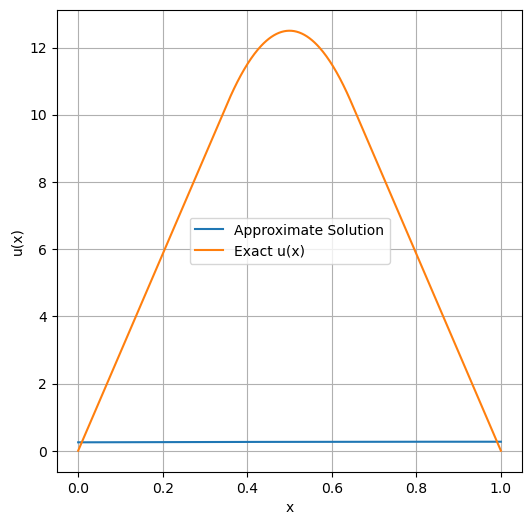

Epoch 100/6000, Loss: 15012.744140625


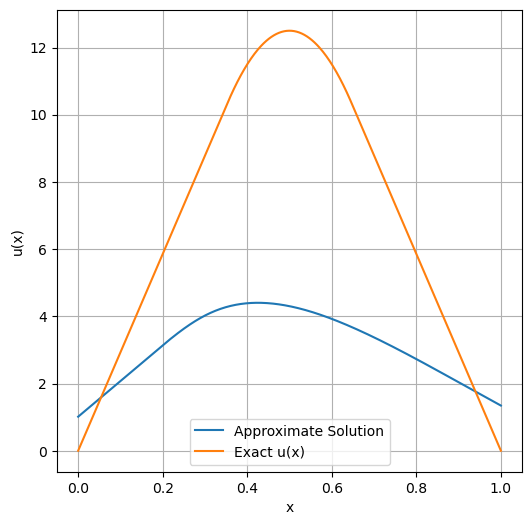

Epoch 200/6000, Loss: 2806.566650390625


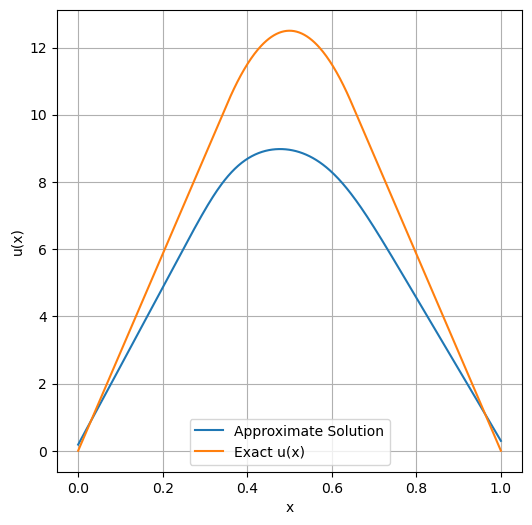

Epoch 300/6000, Loss: 1997.186279296875


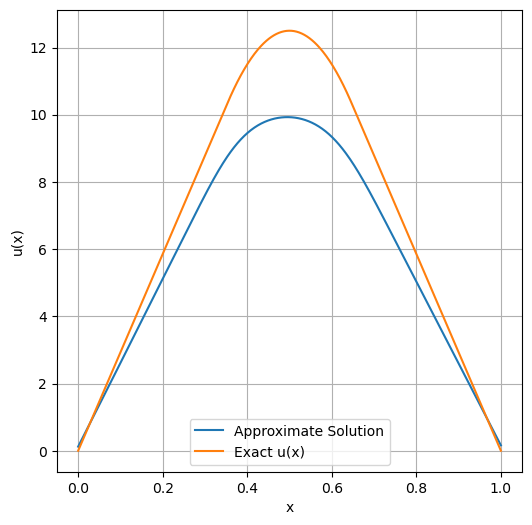

Epoch 400/6000, Loss: 1050.8780517578125


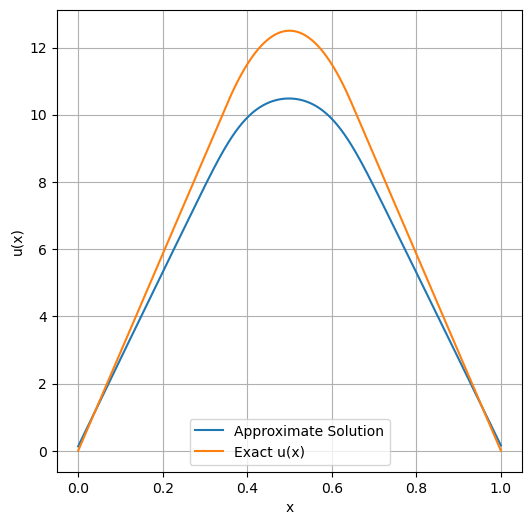

Epoch 500/6000, Loss: 1072.8262939453125


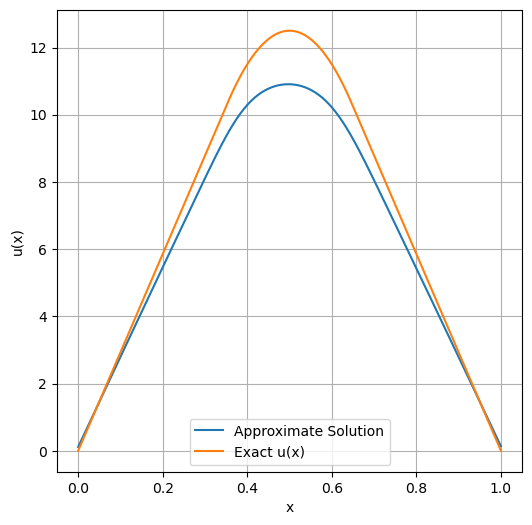

Epoch 600/6000, Loss: 842.6647338867188


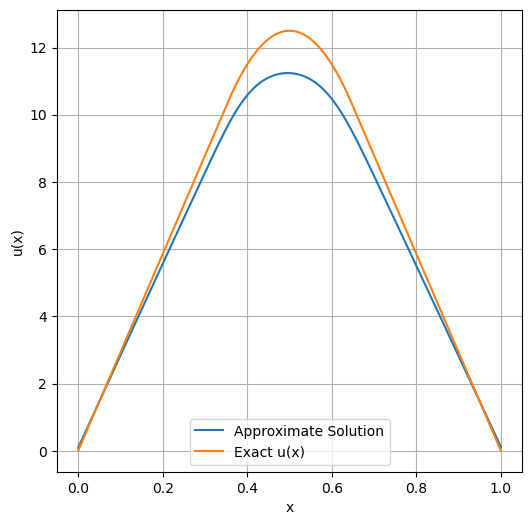

Epoch 700/6000, Loss: 583.9076538085938


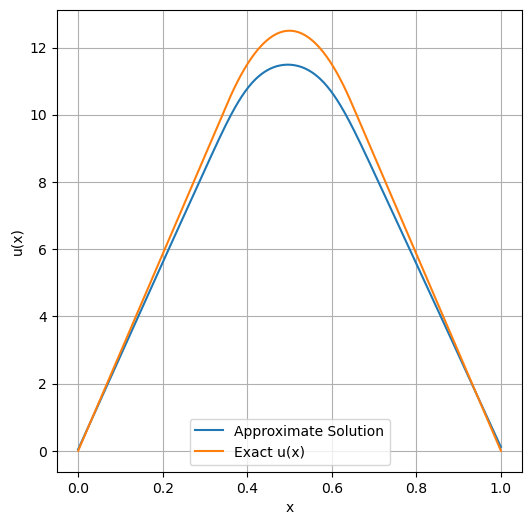

Epoch 800/6000, Loss: 459.7450866699219


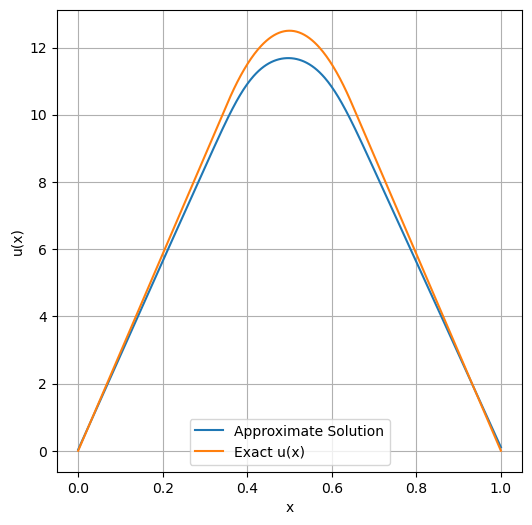

Epoch 900/6000, Loss: 384.74737548828125


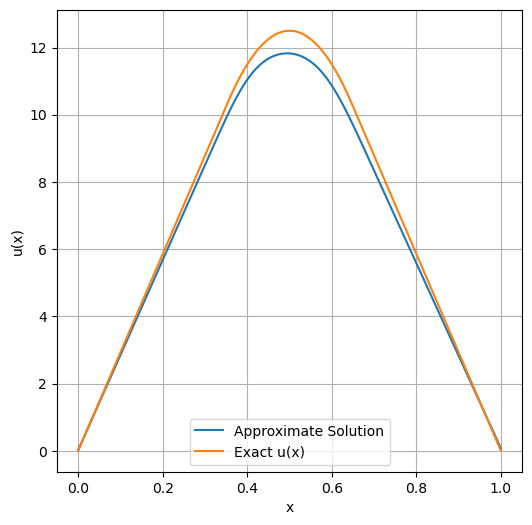

Epoch 1000/6000, Loss: 252.9291534423828


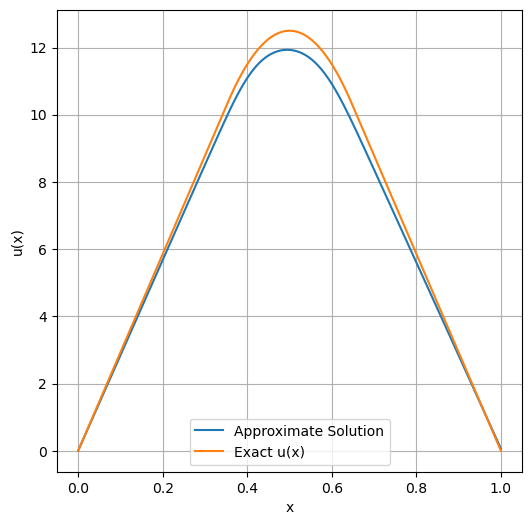

Epoch 1100/6000, Loss: 392.5825500488281


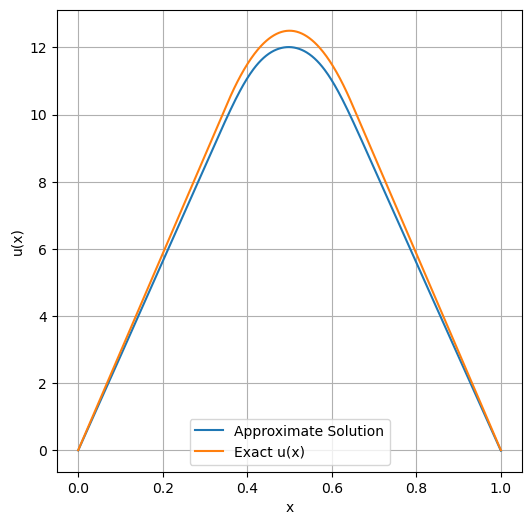

Epoch 1200/6000, Loss: 336.5421142578125


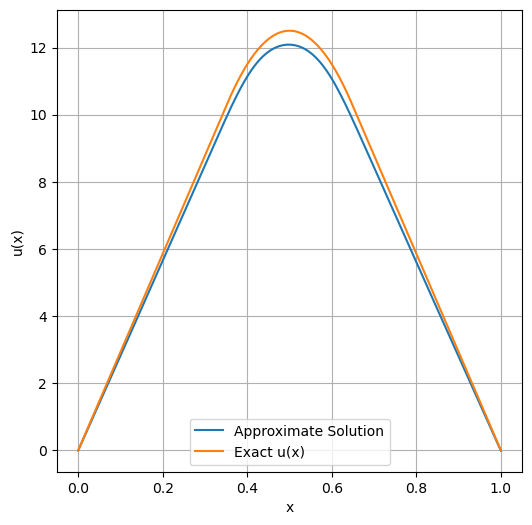

Epoch 1300/6000, Loss: 308.4971008300781


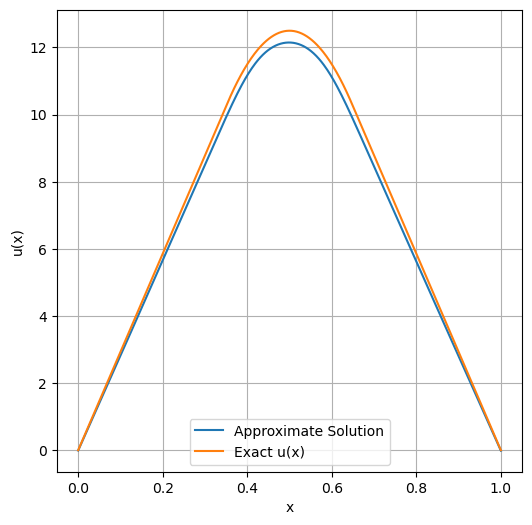

Epoch 1400/6000, Loss: 376.37890625


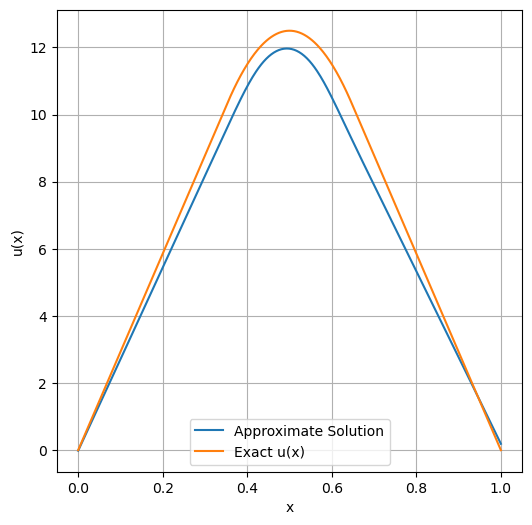

Epoch 1500/6000, Loss: 278.2001647949219


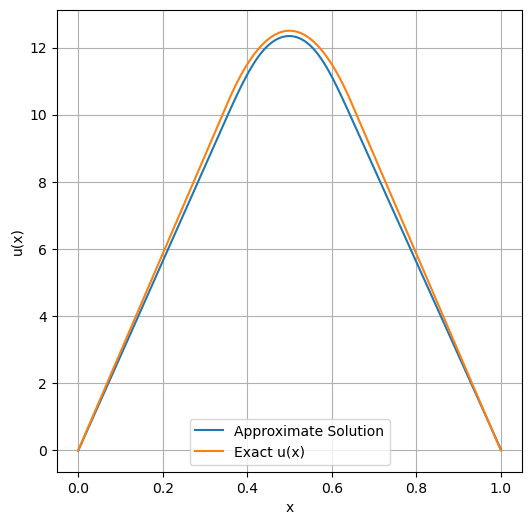

Epoch 1600/6000, Loss: 270.5570068359375


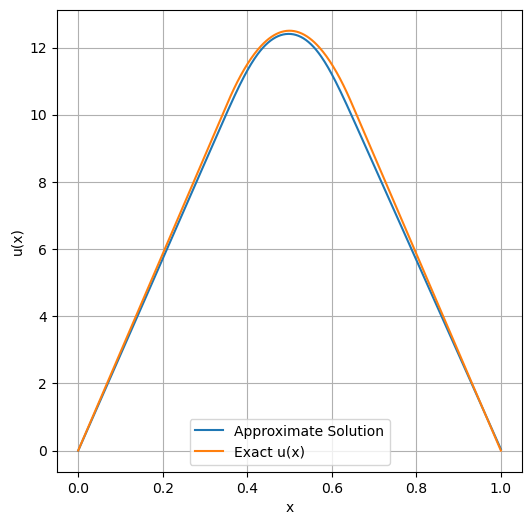

Epoch 1700/6000, Loss: 486.4559631347656


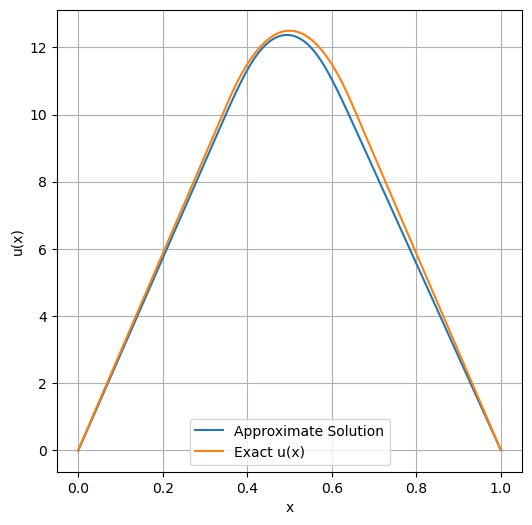

Epoch 1800/6000, Loss: 560.0945434570312


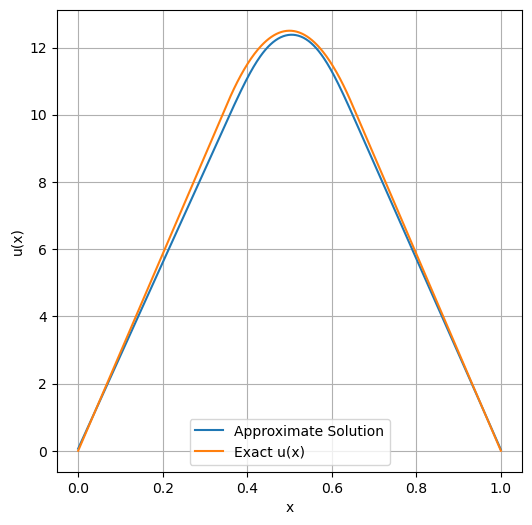

Epoch 1900/6000, Loss: 205.44285583496094


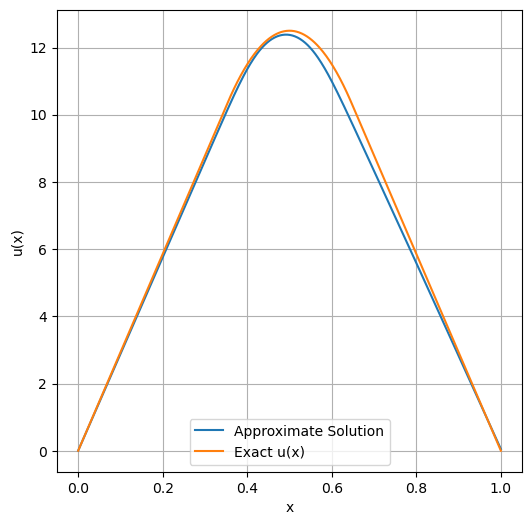

Epoch 2000/6000, Loss: 281.47857666015625


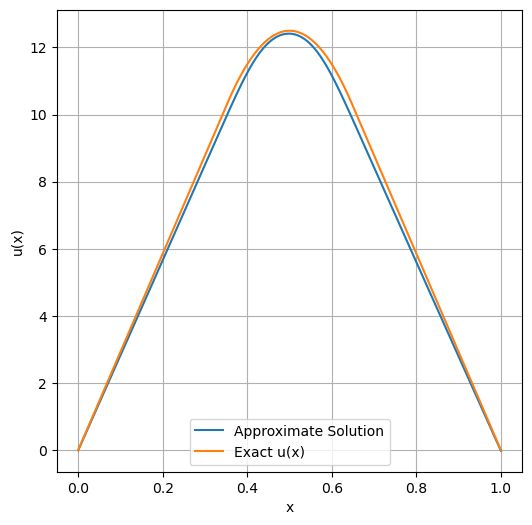

Epoch 2100/6000, Loss: 137.16180419921875


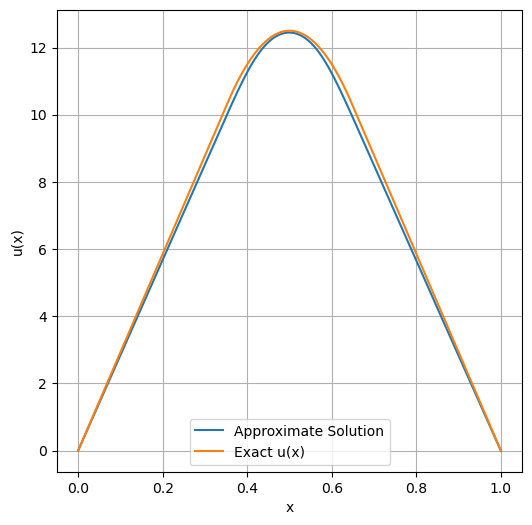

Epoch 2200/6000, Loss: 533.3951416015625


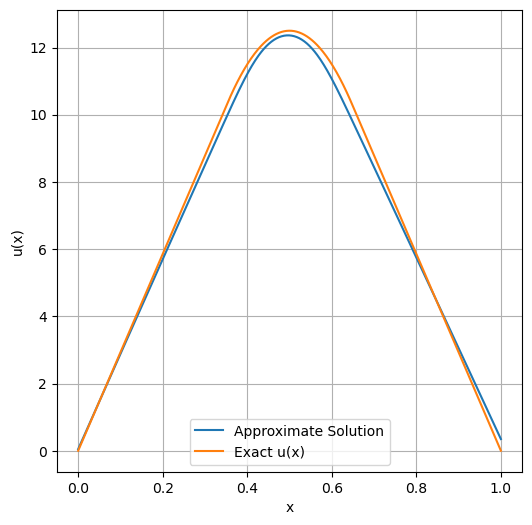

Epoch 2300/6000, Loss: 290.3892517089844


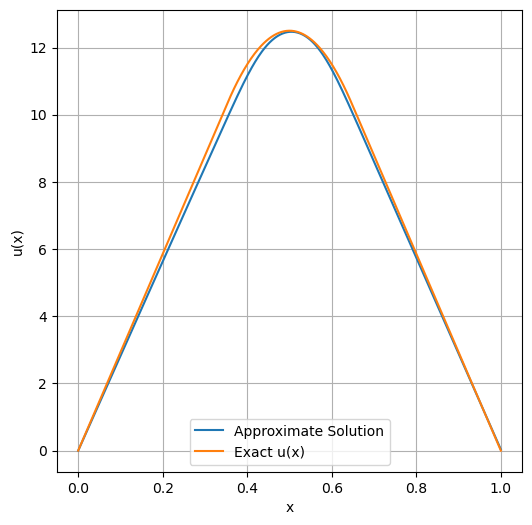

Epoch 2400/6000, Loss: 26654.46875


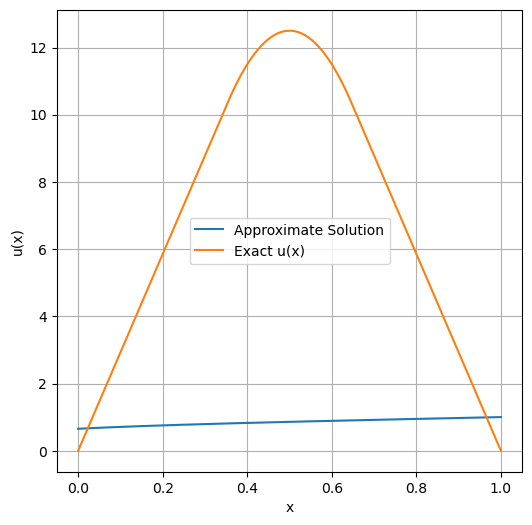

Epoch 2500/6000, Loss: 13950.779296875


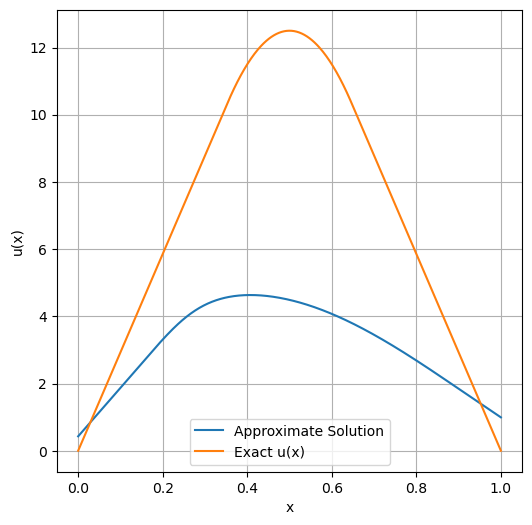

Epoch 2600/6000, Loss: 6031.68505859375


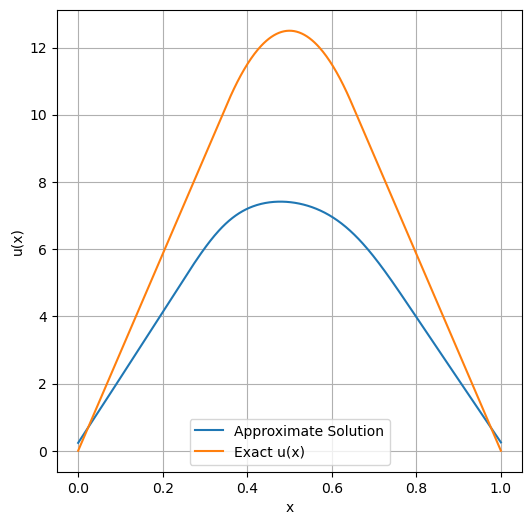

Epoch 2700/6000, Loss: 4265.99072265625


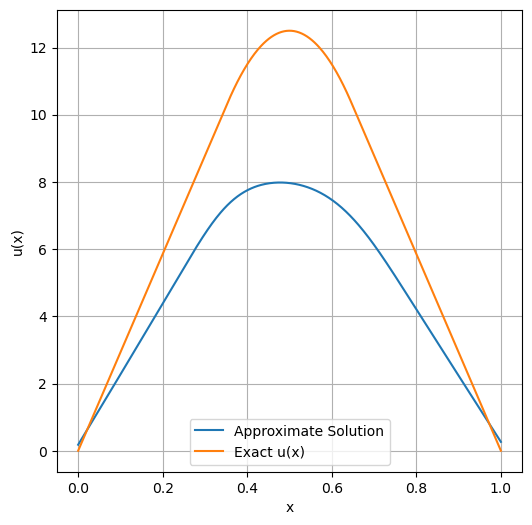

Epoch 2800/6000, Loss: 3807.634765625


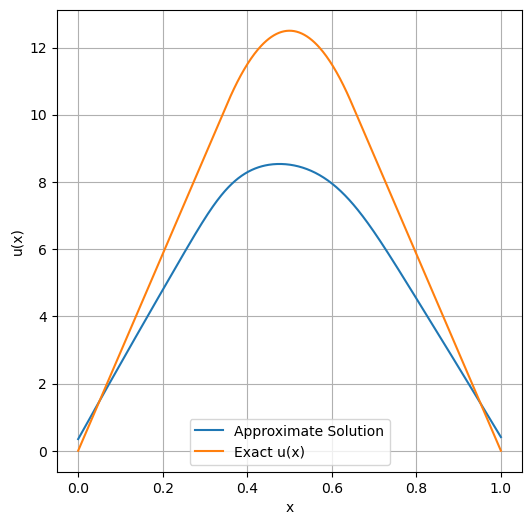

Epoch 2900/6000, Loss: 3672.866455078125


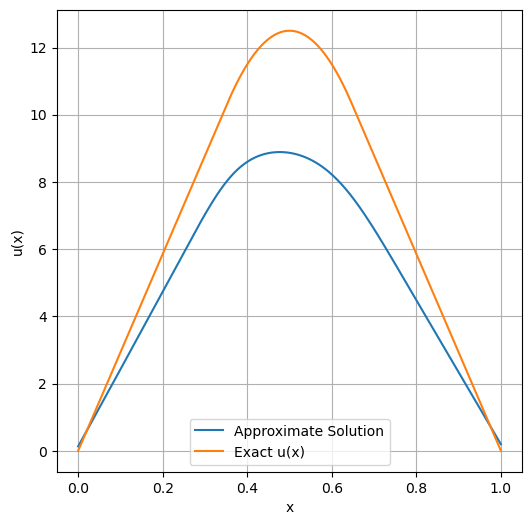

Epoch 3000/6000, Loss: 1689.303955078125


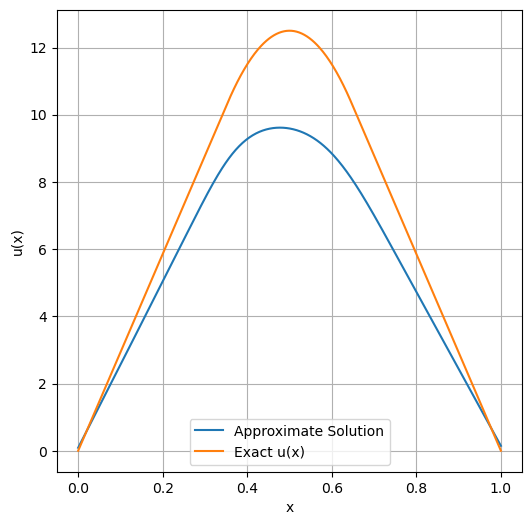

Epoch 3100/6000, Loss: 1493.0777587890625


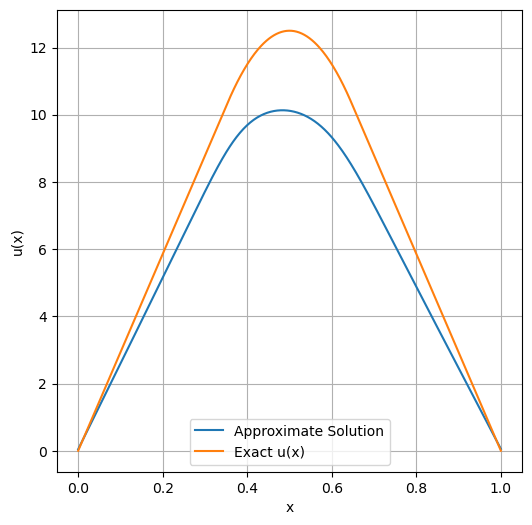

Epoch 3200/6000, Loss: 1193.2574462890625


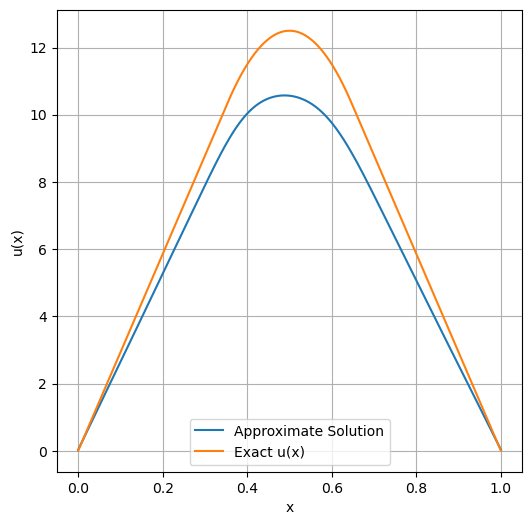

Epoch 3300/6000, Loss: 1014.3539428710938


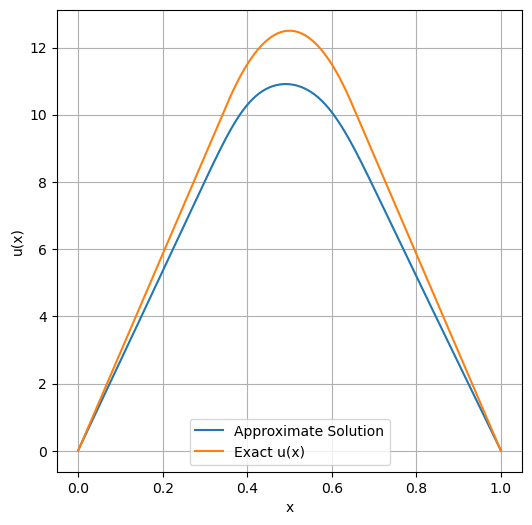

Epoch 3400/6000, Loss: 730.3641357421875


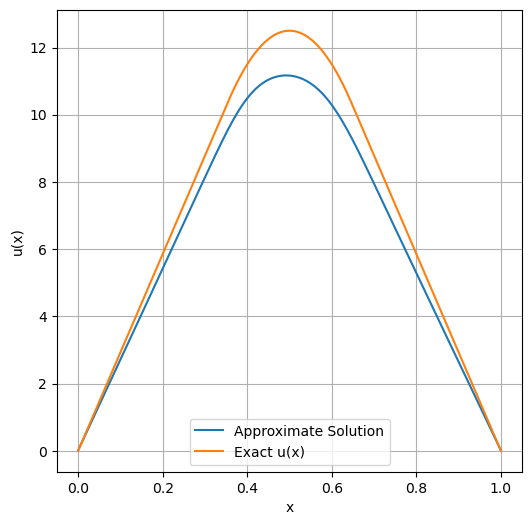

Epoch 3500/6000, Loss: 517.0390625


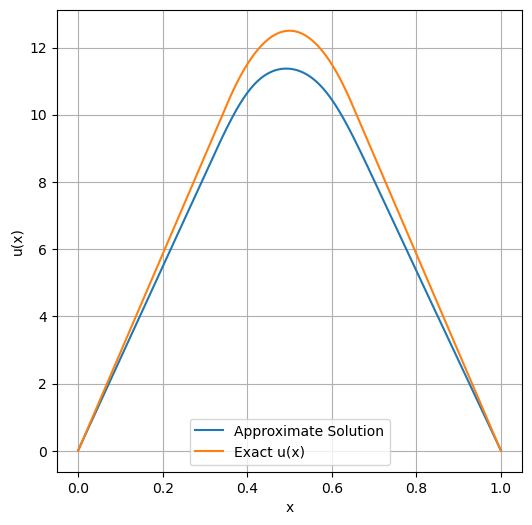

Epoch 3600/6000, Loss: 407.9749450683594


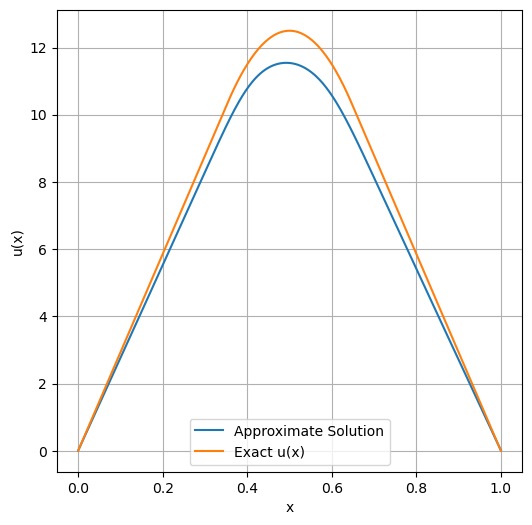

Epoch 3700/6000, Loss: 426.3507385253906


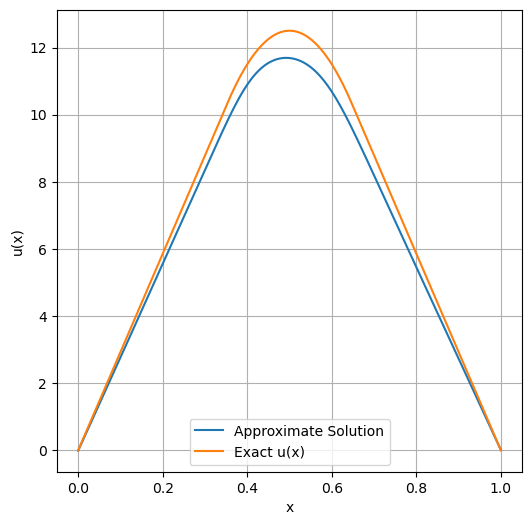

Epoch 3800/6000, Loss: 412.67364501953125


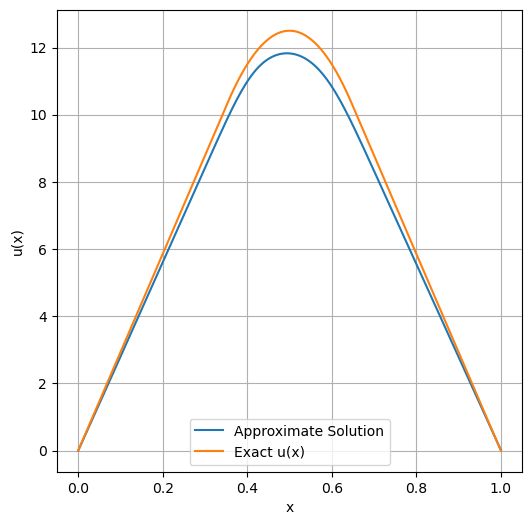

Epoch 3900/6000, Loss: 283.54541015625


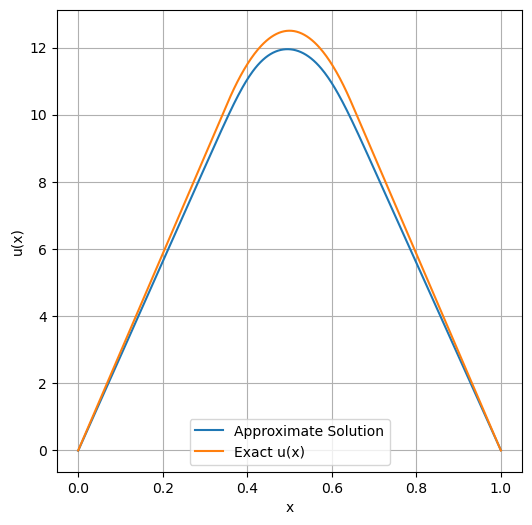

Epoch 4000/6000, Loss: 278.05810546875


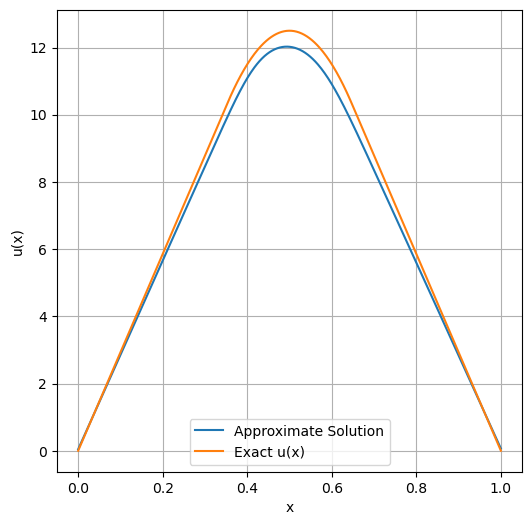

Epoch 4100/6000, Loss: 471.6487731933594


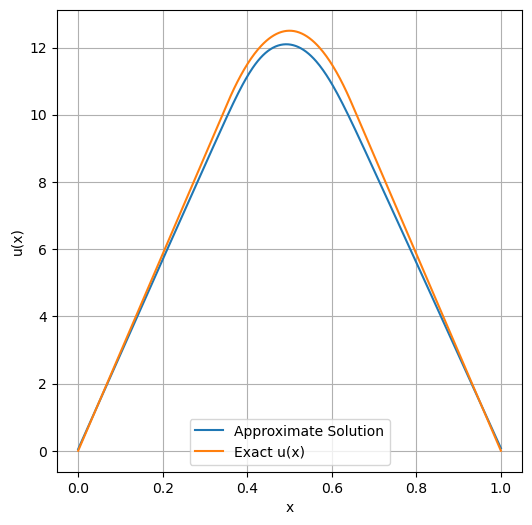

Epoch 4200/6000, Loss: 456.4561767578125


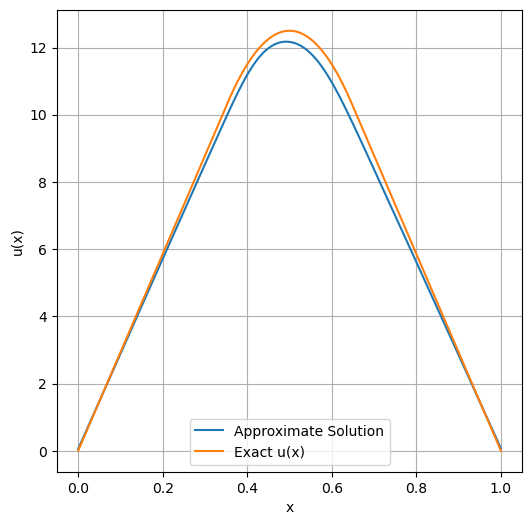

Epoch 4300/6000, Loss: 349.7701110839844


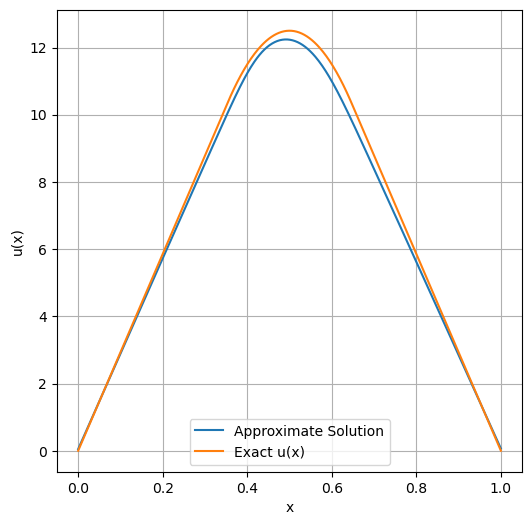

Epoch 4400/6000, Loss: 328.0840148925781


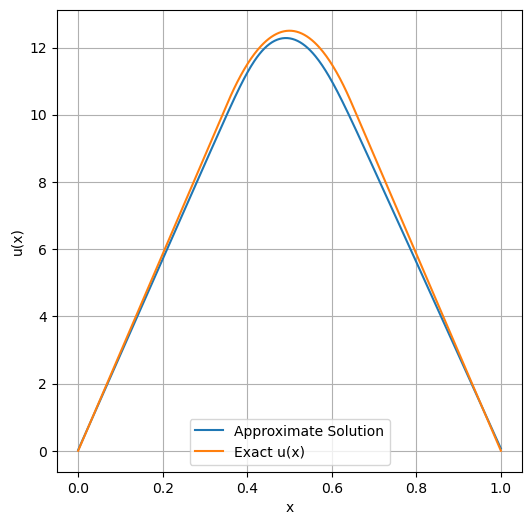

Epoch 4500/6000, Loss: 269.5225830078125


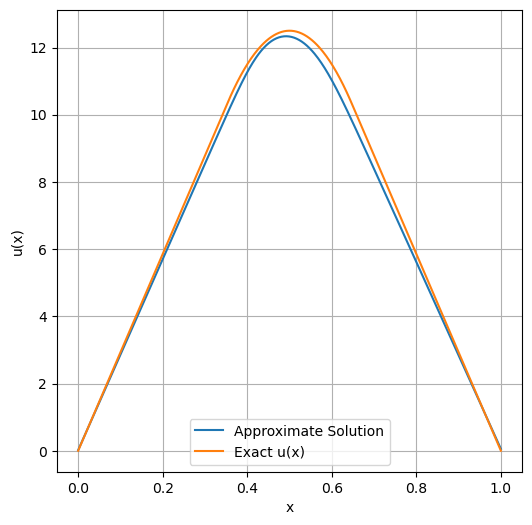

Epoch 4600/6000, Loss: 325.7060241699219


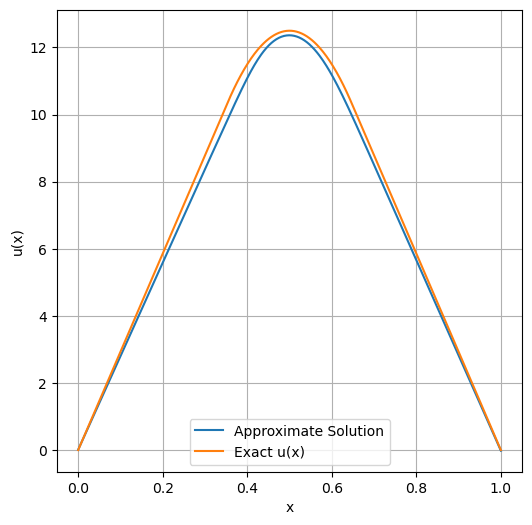

Epoch 4700/6000, Loss: 867431.6875


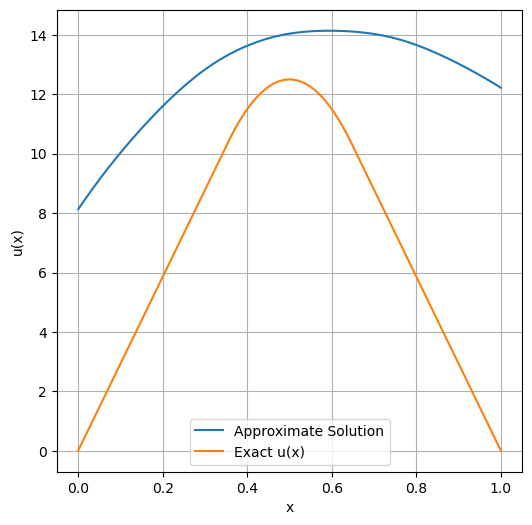

Epoch 4800/6000, Loss: 11079.9365234375


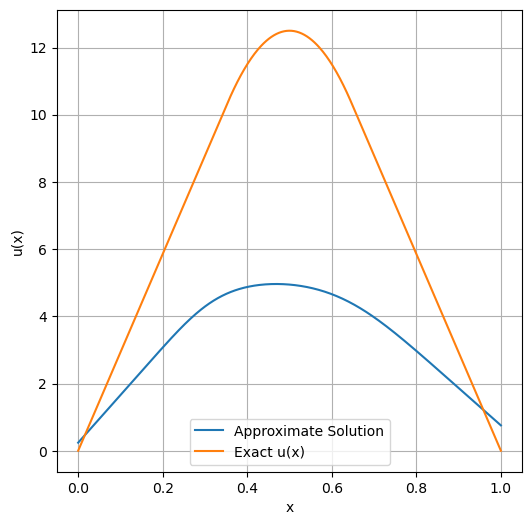

Epoch 4900/6000, Loss: 2620.499267578125


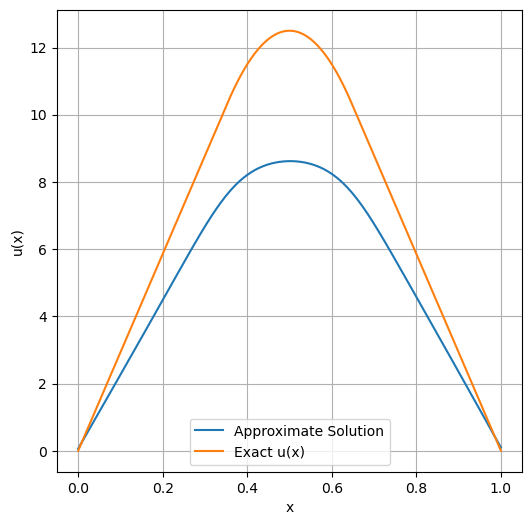

Epoch 5000/6000, Loss: 1958.6009521484375


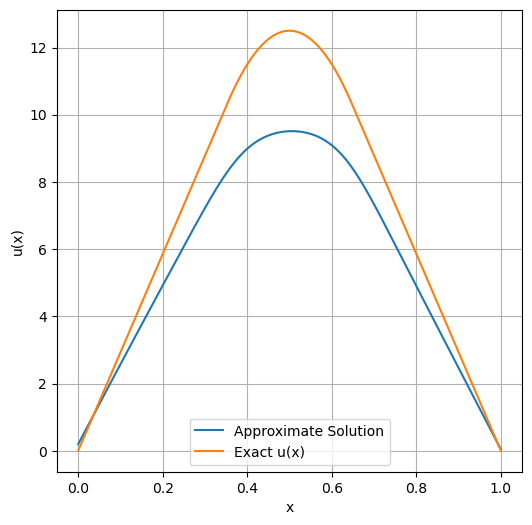

Epoch 5100/6000, Loss: 2557.37109375


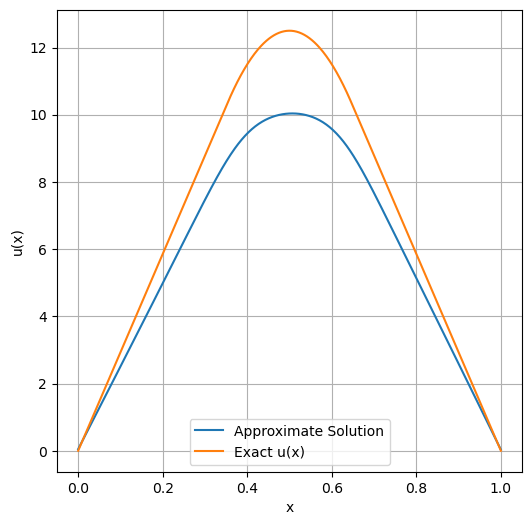

Epoch 5200/6000, Loss: 927.6339111328125


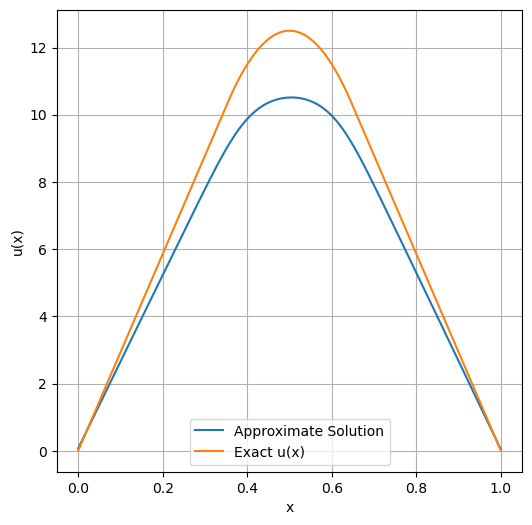

Epoch 5300/6000, Loss: 1355.04541015625


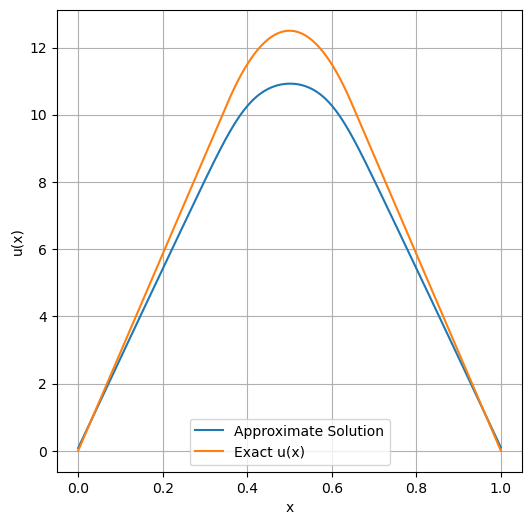

Epoch 5400/6000, Loss: 964.5401000976562


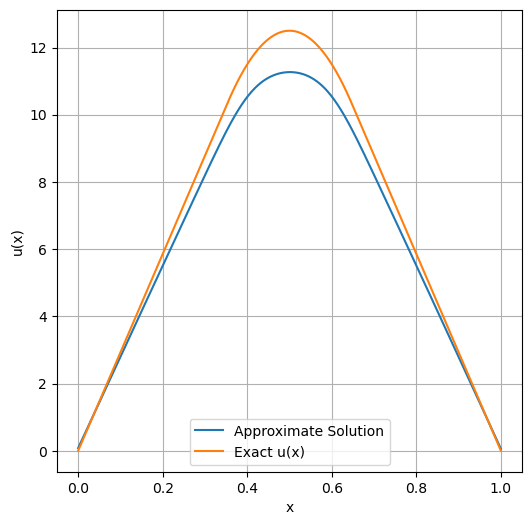

Epoch 5500/6000, Loss: 747.2081909179688


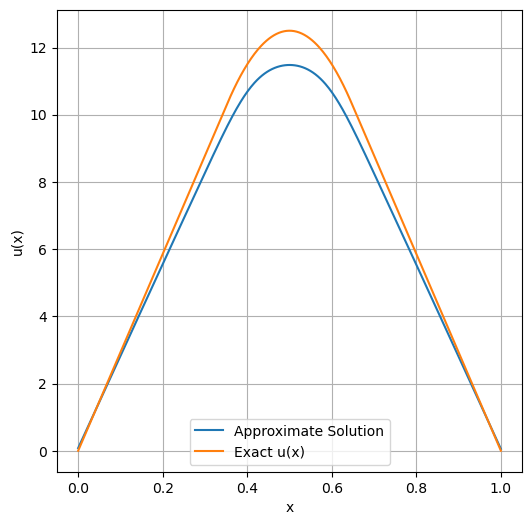

Epoch 5600/6000, Loss: 665.7996215820312


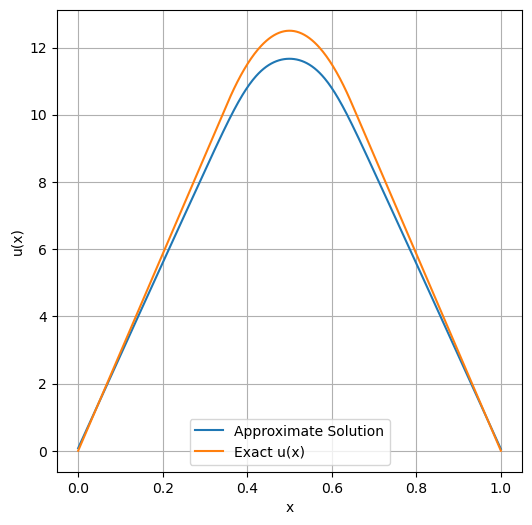

Epoch 5700/6000, Loss: 573.9378662109375


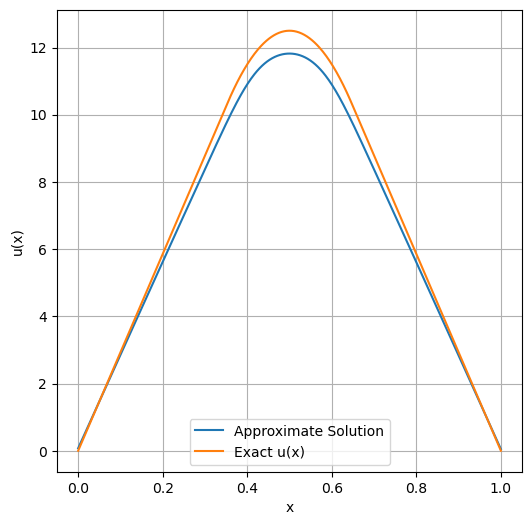

Epoch 5800/6000, Loss: 466.62384033203125


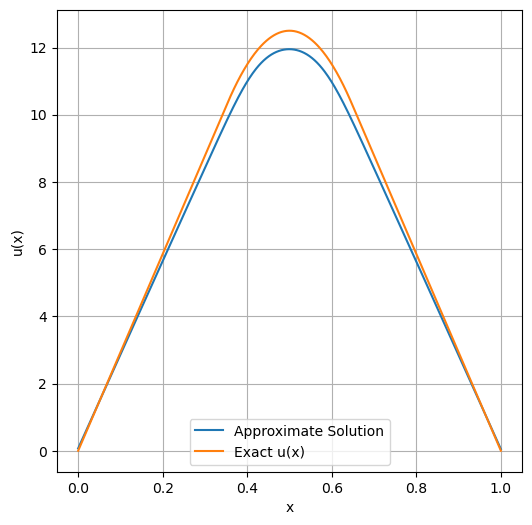

Epoch 5900/6000, Loss: 372.9249572753906


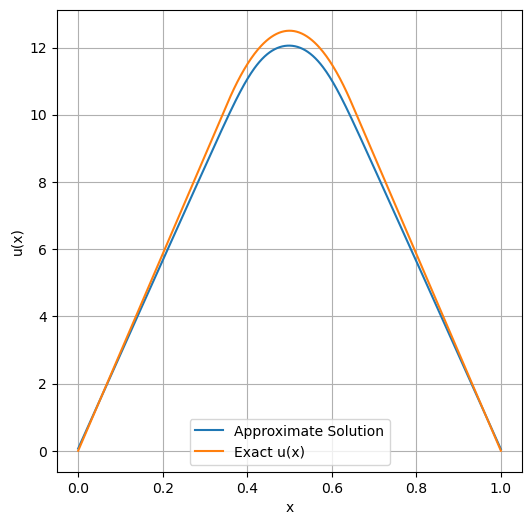

In [17]:
class PINN(nn.Module):
    def __init__(self,num_layers = 5, hidden_size = 60, output_size = 1, input_size = 1):
        
        super().__init__()
        h = hidden_size
        assert num_layers >=2
        self.fc_u = nn.ModuleList()
        self.ln_u = nn.ModuleList()
#         self.fc_lambda = nn.ModuleList()
#         self.ln_lambda = nn.ModuleList()
        self.fc_u.append(nn.Linear(input_size, h))
        self.ln_u.append(nn.Tanh())
        for _ in range(num_layers - 2):
            self.fc_u.append(nn.Linear(h, h))
            self.ln_u.append(nn.Tanh())
        self.fc_u.append(nn.Linear(h, output_size))
#         self.fc_lambda.append(nn.Linear(input_size, h))
#         self.ln_lambda.append(nn.LayerNorm(h))
        
        
#         for _ in range(num_layers - 2):
#             self.fc_lambda.append(nn.Linear(h, h))
#             self.ln_lambda.append(nn.Tanh())
#         self.fc_lambda.append(nn.Linear(h, output_size))
        
#         self.fc_lambda.apply(lambda_weights_init)
#         self.fc_u.apply(u_weights_init)

    def forward(self, x):
        u = self.u_net(x)
#         lambda_val = self.lambda_net(x)
        return u #, lambda_val

    def u_net(self, x):
        for i in range(len(self.fc_u) - 1):
            layer = self.fc_u[i]
            tanh = self.ln_u[i]
            x = layer(x)
            x = tanh(x)
        x = self.fc_u[-1](x)
        return x

#     def lambda_net(self, x):
#         for i in range(len(self.fc_lambda) - 1):
#             layer = self.fc_lambda[i]
#             tanh = self.ln_lambda[i]
#             x = layer(x)
#             x = tanh(x)
            
#         x = self.fc_lambda[-1](x)
#         x = -torch.exp(x)
#         return x
    
# def lambda_weights_init(m):
#     if isinstance(m, nn.Linear):
#         torch.nn.init.normal_(m.weight, mean=-1 , std=0.4)  # Initialize weights with a normal distribution centered at -0.5
#         m.bias.data.fill_(0.01)
        
# def u_weights_init(m):
#     if isinstance(m, nn.Linear):
#         torch.nn.init.normal_(m.weight, mean=2, std=1)  # Initialize weights with a normal distribution centered at 2
#         m.bias.data.fill_(0.01)

def cal_u_exact(x):
    # x = np.linspace(0,1,100)
    u = torch.zeros_like(x)
    cond1 = (x>=0) * (x< 1/(2*math.sqrt(2)))
    cond2 = (x>= 1/(2*math.sqrt(2))) * (x< 0.5)
    cond3 = (x>=0.5) * (x<1- 1/(2*math.sqrt(2)))
    cond4 = (x>= ( 1 - 1/(2*math.sqrt(2)))) * (x<=1)
    x1 = x[cond1]
    x2 = x[cond2]
    x3 = x[cond3]
    x4 = x[cond4]
    u[cond1] = (100 - 50 * math.sqrt(2)) *x1
    u[cond2] = 100 * x2 * (1 - x2) - 12.5
    u[cond3] = 100 * x3 * (1 - x3) - 12.5
    u[cond4] = (100 - 50 * math.sqrt(2)) * (1 - x4)
    # if config['visual'] == True:
    # plt.plot(x,u);plt.show()
    return u
        
def g(x):
    # x = np.linspace(0,1,100)
    out = torch.zeros_like(x)
    cond1 = (x>=0) * (x<0.25)
    cond2 = (x>= 0.25) * (x< 0.5)
    cond3 = (x>=0.5) * (x < 0.75)
    cond4 = (x>=0.75) * (x <= 1.0)
    x1 = x[cond1]
    x2 = x[cond2]
    x3 = x[cond3]
    x4 = x[cond4]
    out[cond1] = 100 * x1**2
    out[cond2] = 100 * x2 * (1 - x2) - 12.5
    out[cond3] = 100 * x3 * (1 - x3) - 12.5
    out[cond4] = 100 * (1 - x4)**2
    # if config['visual'] == True:
    #     plt.plot(x,g);plt.show()
    return out


def differentiable_heaviside(x, epsilon=1e-6):
    return (torch.tanh(x / epsilon) + 1) / 2



def loss_function(u, x, g, gamma):
    u_prime = torch.autograd.grad(u, x, grad_outputs=torch.ones_like(u), create_graph=True, retain_graph=True)[0]
    u_doubleprime = torch.autograd.grad(u_prime, x, grad_outputs=torch.ones_like(u_prime), create_graph=True, retain_graph=True)[0]
    
#     loss = (10**(-3)) * torch.sum(torch.square(torch.min((- u_doubleprime + lambda_val), torch.zeros_like(- u_doubleprime - lambda_val))))
#     loss = torch.sum(torch.square(torch.mul(torch.heaviside((u - g), values = torch.tensor([1.0])), u_doubleprime)))
    
    heaviside_approx = differentiable_heaviside(u - g)  # Use the differentiable Heaviside function
    
    loss = torch.sum(torch.square(torch.mul(heaviside_approx, u_doubleprime)))
    
    obstacle_term = torch.relu(g - u) #torch.min((u - g), torch.zeros_like(u - g))
    loss += torch.sum(torch.square(obstacle_term))    
#     loss += torch.sum(torch.square(lambda_val + (1/gamma) * torch.max(torch.zeros_like(u), g - gamma * lambda_val - u)))  # lambda = -(1/gamma) * max(0, u - gamma * lambda - g)
    loss += (10**(3)) * torch.sum(torch.square(u[0]))
    loss += (10**(3)) * torch.sum(torch.square(u[-1]))    

    return torch.sum(loss)

def train(model, x, g, gamma, epochs=6000, lr=0.001):
    optimizer = optim.Adam(model.parameters(), lr=lr)

    for epoch in range(epochs):
        optimizer.zero_grad()
        u = model(x)
        
        energy = loss_function(u, x, g, gamma)
        loss = energy 
        loss.backward(retain_graph=True)
        torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        optimizer.step()

        if epoch % 100 == 0:
            
            print(f"Epoch {epoch}/{epochs}, Loss: {loss.item()}")
            x_np = x.detach().numpy()
            u_np = model.u_net(x).detach().numpy()
            u_exact_np = cal_u_exact(x).detach().numpy()

            plt.figure(figsize=(6, 6))
            plt.plot(x_np, u_np, label='Approximate Solution')
            plt.plot(x_np, u_exact_np, label='Exact u(x)')
#             plt.plot(x_np, g.detach().numpy(), label='Obstacle g(x)')
#             plt.plot(x_np, lambda_np, label='Lambda Function')
            plt.xlabel('x')
            plt.ylabel('u(x)')
#             plt.title('Approximate Solution; '+f"Epoch {epoch}/{epochs}, Loss: {loss.item()}")
            plt.grid(True)
            plt.legend()
            plt.show()
            
#         if loss < 3000:
#             break


x = torch.linspace(0, 1, 500).reshape(-1, 1)
x.requires_grad_(True)

gx = g(x)  # obstacle function
gamma = 10

model = PINN()



train(model, x, gx, gamma)


Epoch 0/6000, Loss: 71.62853240966797


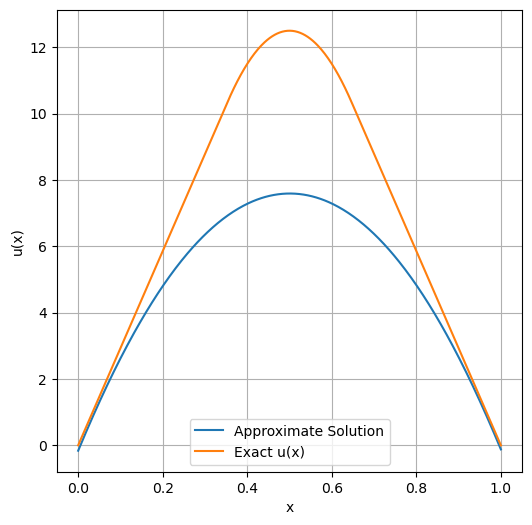

Epoch 100/6000, Loss: 77.60513305664062


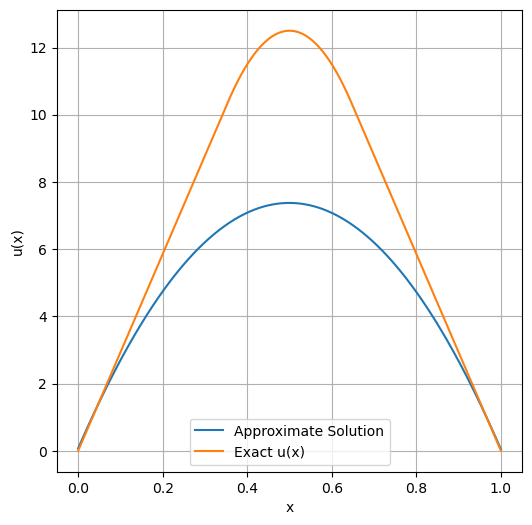

Epoch 200/6000, Loss: 54.98891067504883


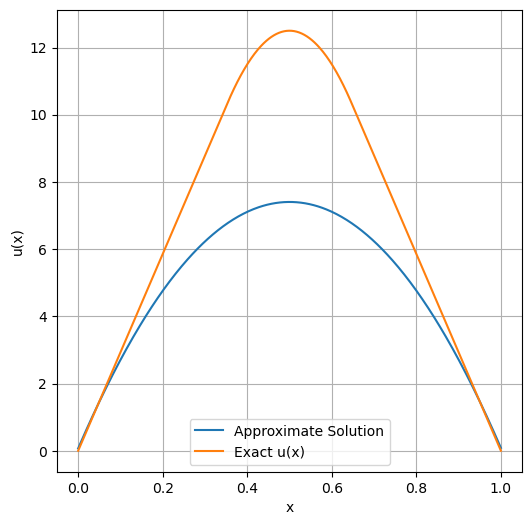

Epoch 300/6000, Loss: 66.64659881591797


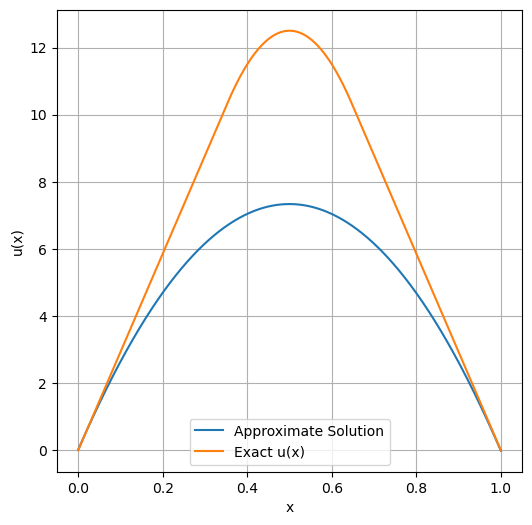

Epoch 400/6000, Loss: 69.89231872558594


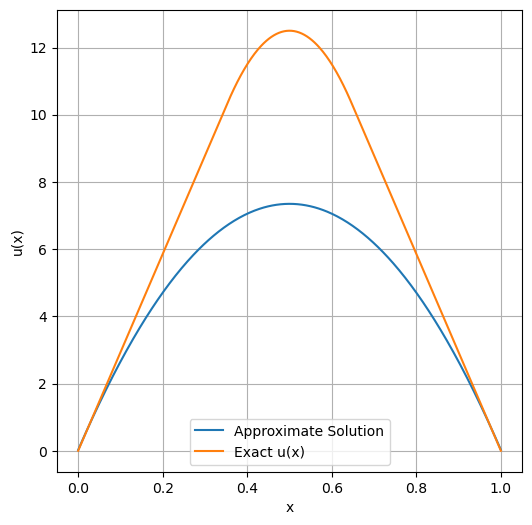

Epoch 500/6000, Loss: 72.00432586669922


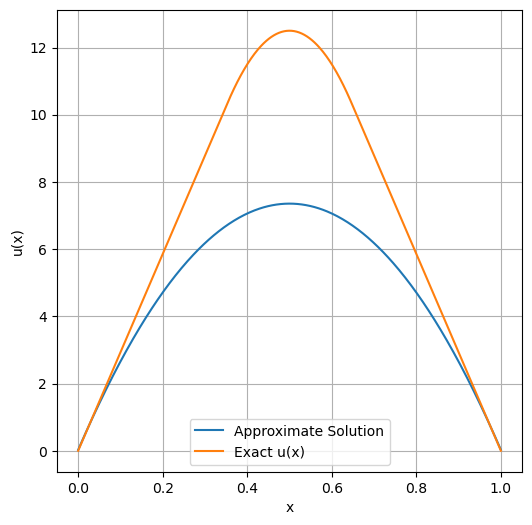

Epoch 600/6000, Loss: 70.95600128173828


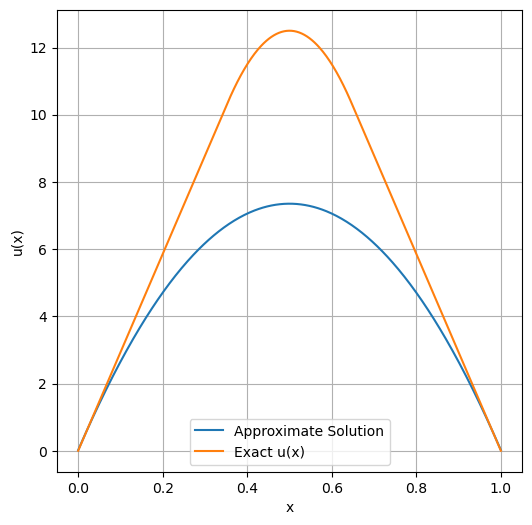

Epoch 700/6000, Loss: 73.64093017578125


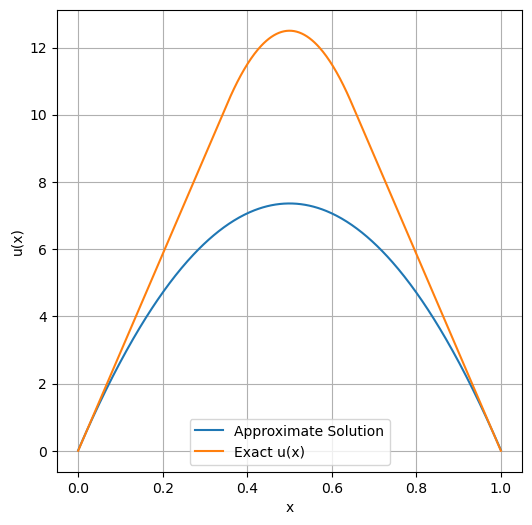

Epoch 800/6000, Loss: 63.8541374206543


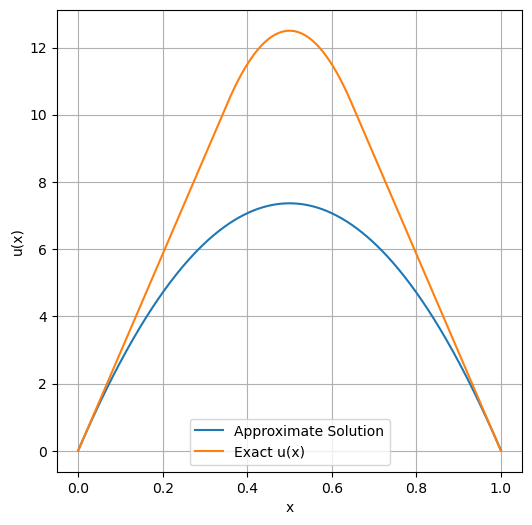

Epoch 900/6000, Loss: 65.02617645263672


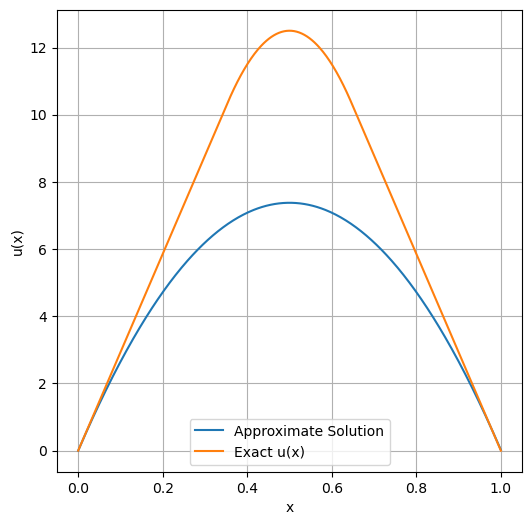

Epoch 1000/6000, Loss: 142.6300048828125


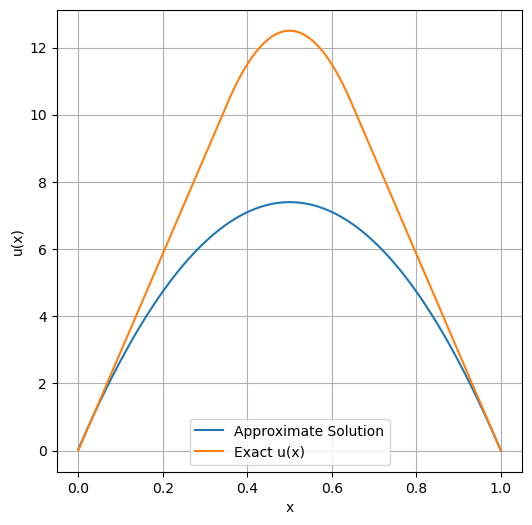

Epoch 1100/6000, Loss: 71.52040100097656


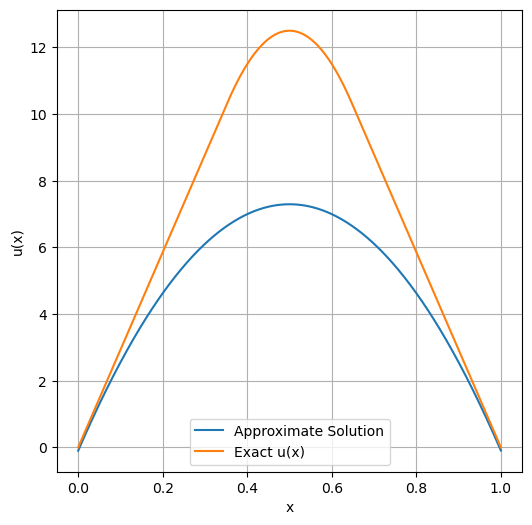

Epoch 1200/6000, Loss: 66.36920928955078


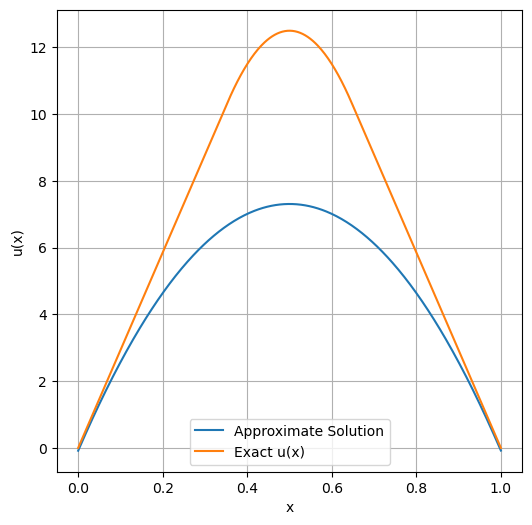

Epoch 1300/6000, Loss: 57.69061279296875


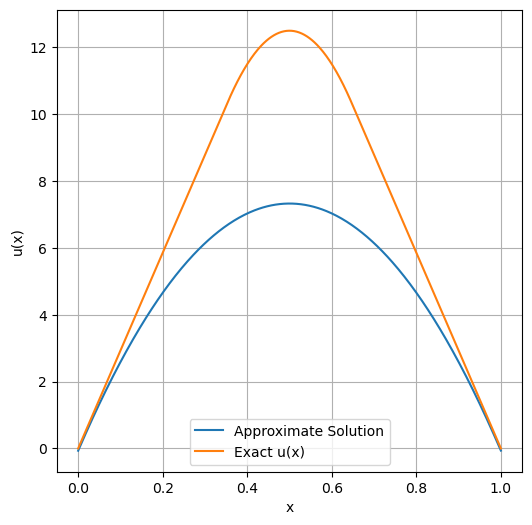

Epoch 1400/6000, Loss: 66.60515594482422


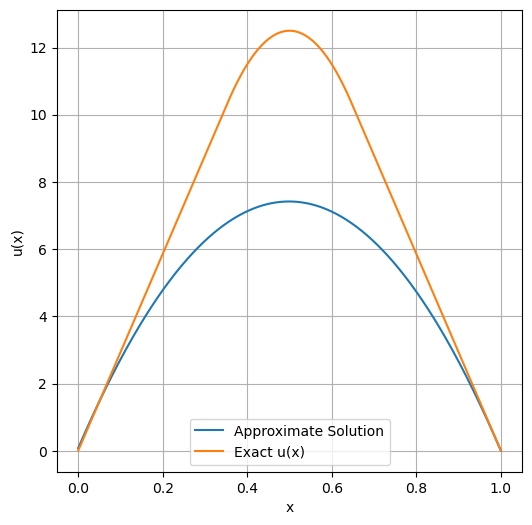

Epoch 1500/6000, Loss: 61.786739349365234


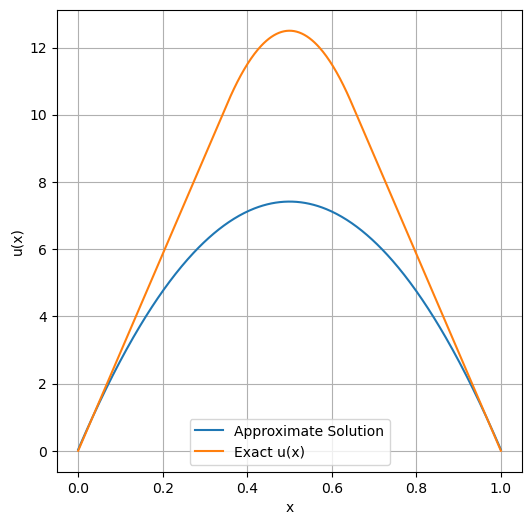

Epoch 1600/6000, Loss: 59.450374603271484


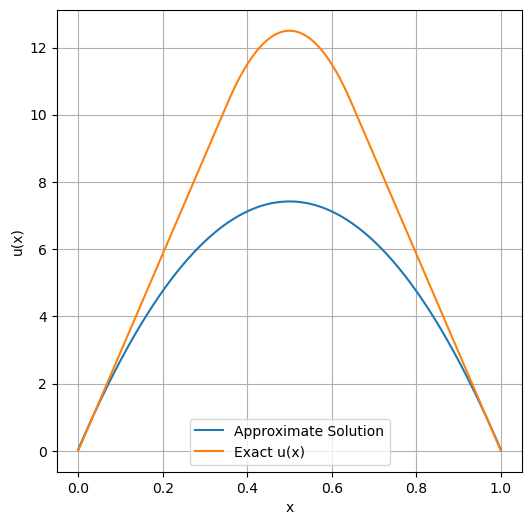

Epoch 1700/6000, Loss: 58.248802185058594


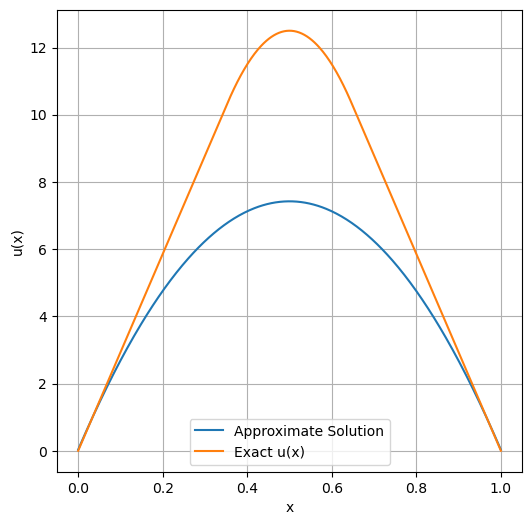

Epoch 1800/6000, Loss: 59.2386360168457


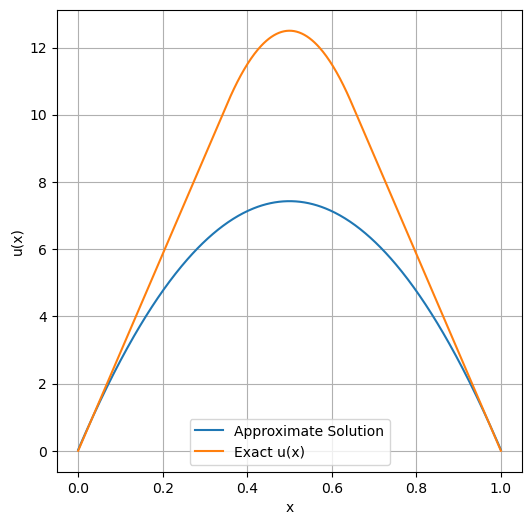

Epoch 1900/6000, Loss: 59.70264434814453


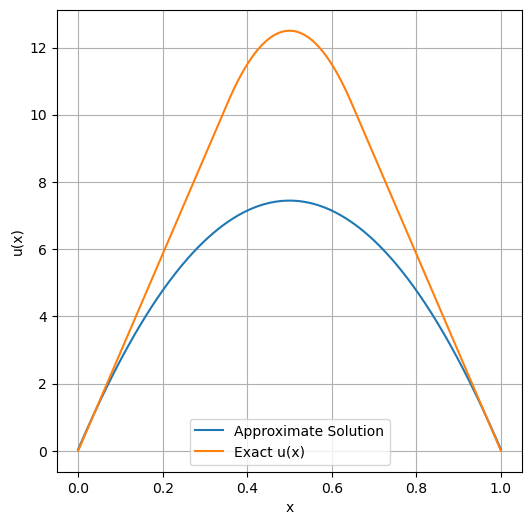

Epoch 2000/6000, Loss: 60.75245666503906


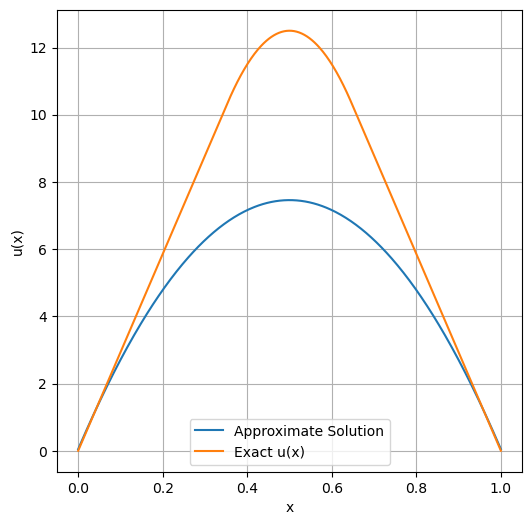

Epoch 2100/6000, Loss: 58.90449523925781


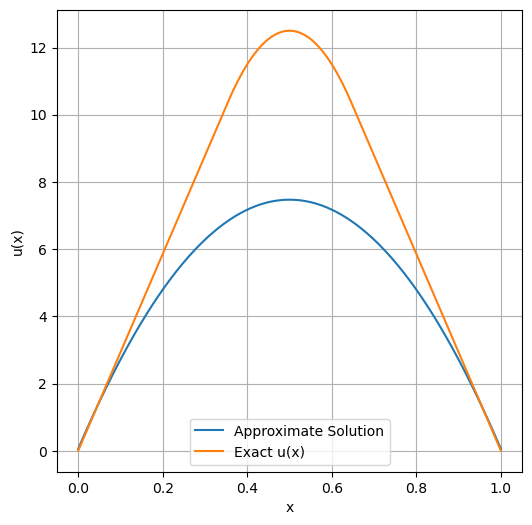

Epoch 2200/6000, Loss: 59.04182434082031


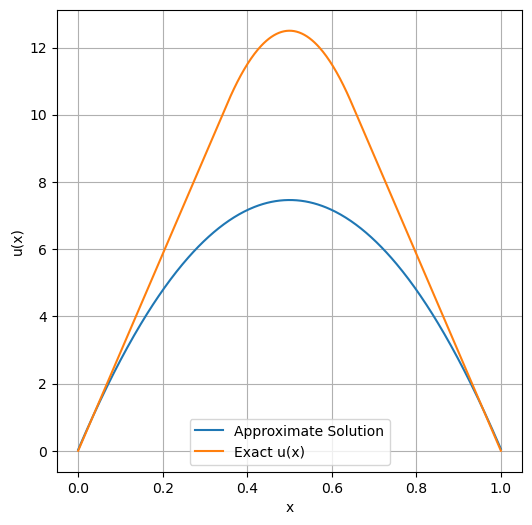

Epoch 2300/6000, Loss: 64.5972900390625


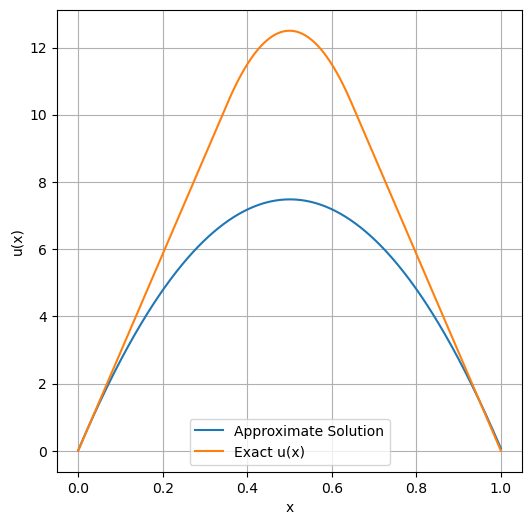

Epoch 2400/6000, Loss: 60.61170959472656


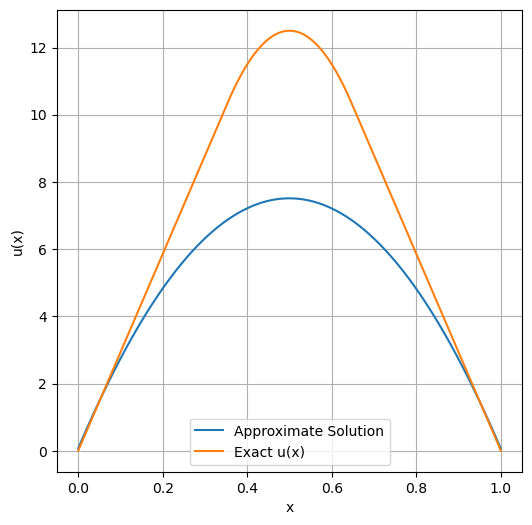

Epoch 2500/6000, Loss: 64.98457336425781


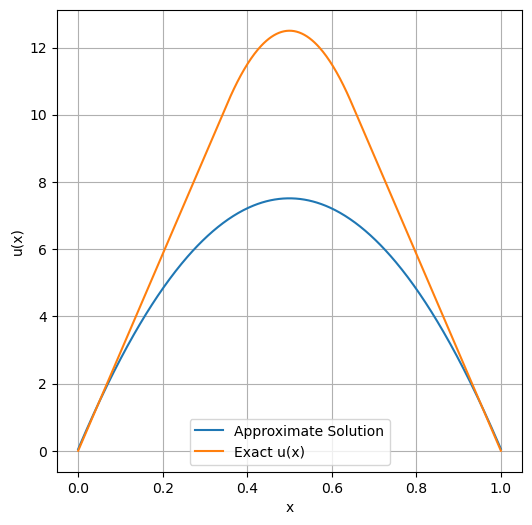

Epoch 2600/6000, Loss: 63.13928985595703


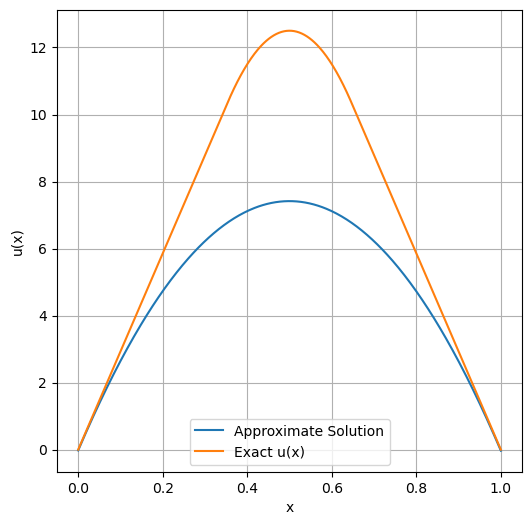

Epoch 2700/6000, Loss: 62.21015548706055


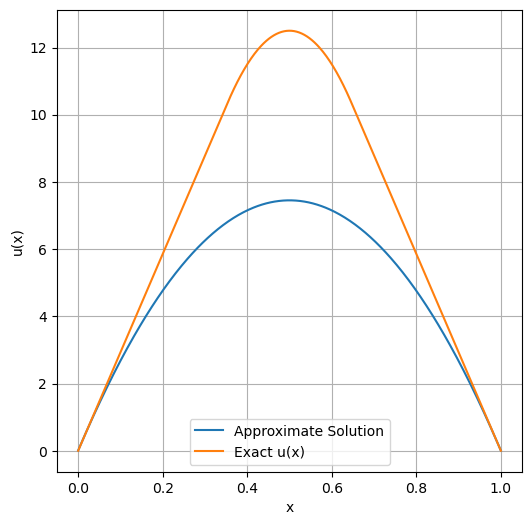

Epoch 2800/6000, Loss: 49.77066421508789


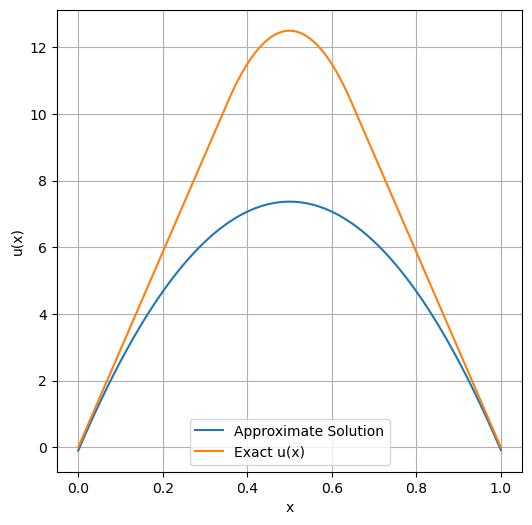

Epoch 2900/6000, Loss: 56.79524230957031


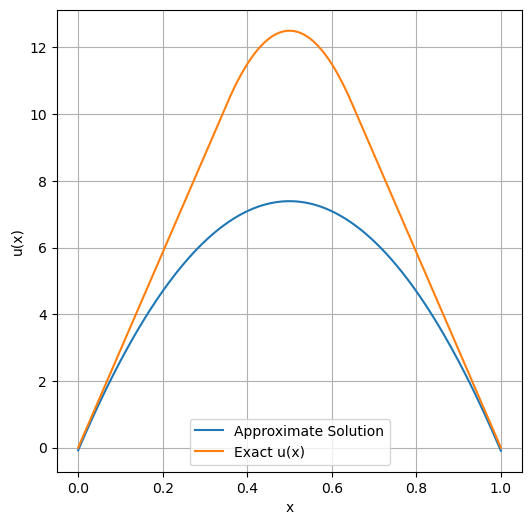

Epoch 3000/6000, Loss: 55.59181594848633


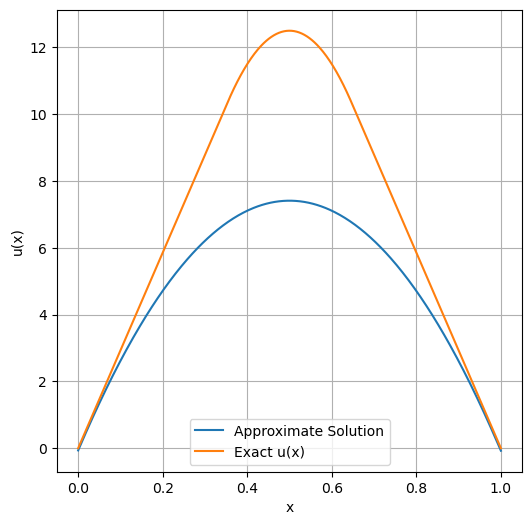

Epoch 3100/6000, Loss: 74.68242645263672


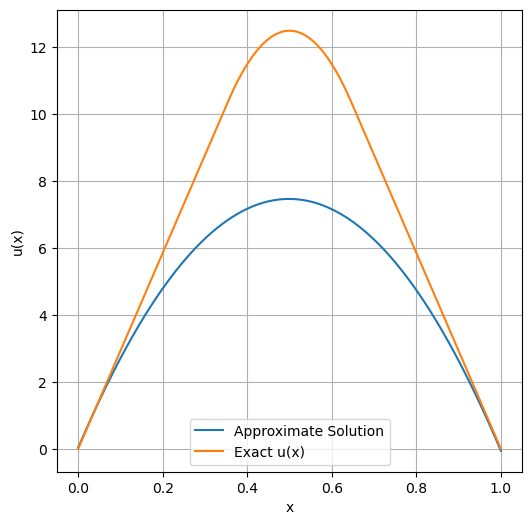

Epoch 3200/6000, Loss: 62.48786163330078


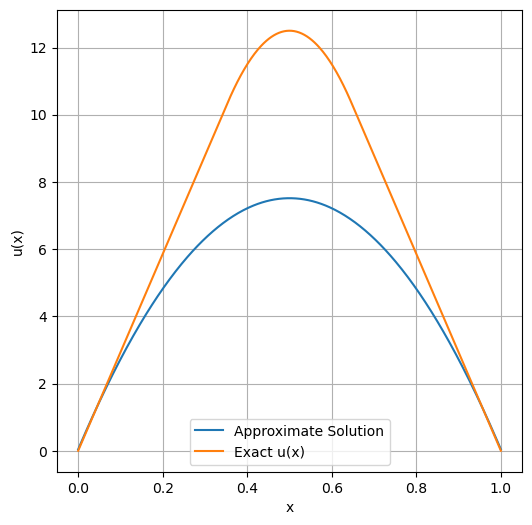

Epoch 3300/6000, Loss: 51.75856018066406


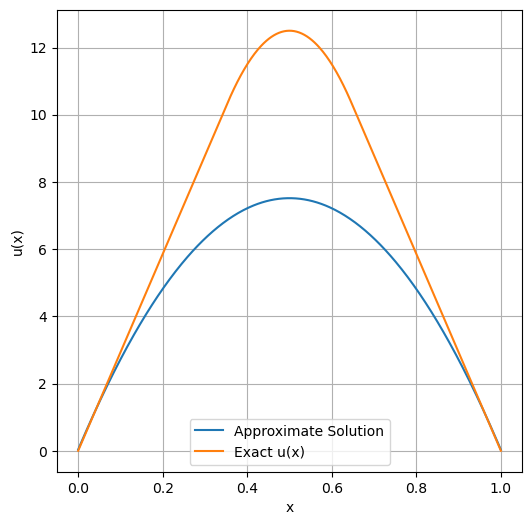

Epoch 3400/6000, Loss: 59.847904205322266


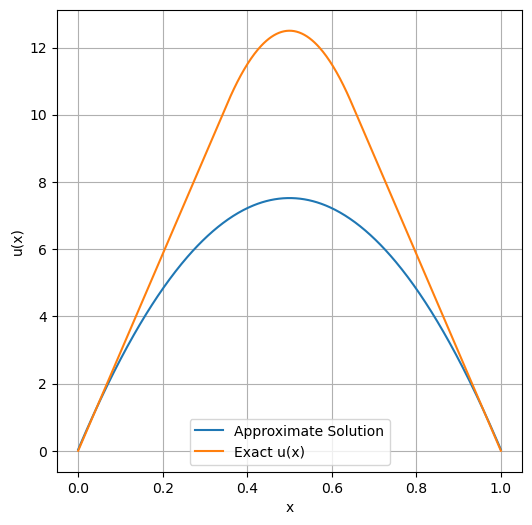

Epoch 3500/6000, Loss: 58.939796447753906


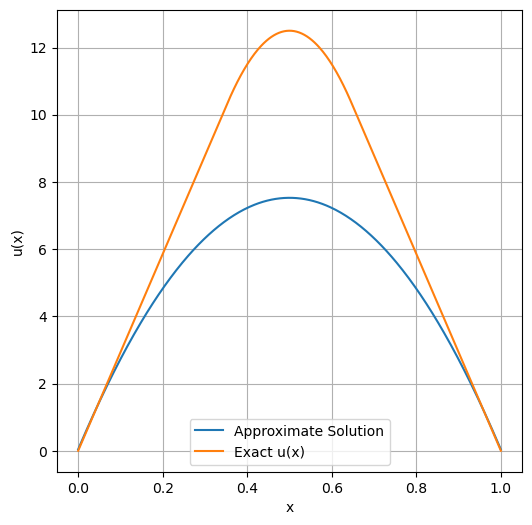

Epoch 3600/6000, Loss: 62.67377853393555


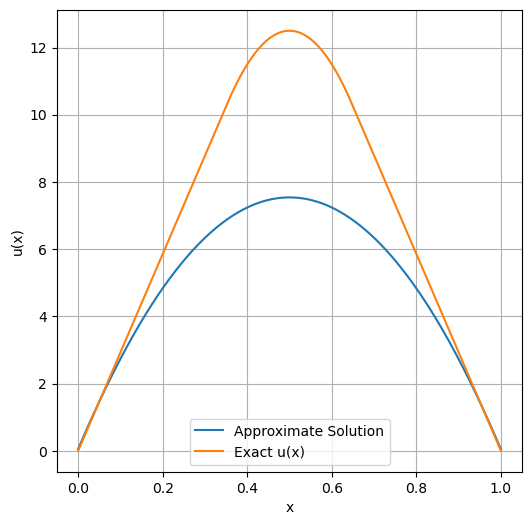

Epoch 3700/6000, Loss: 60.460445404052734


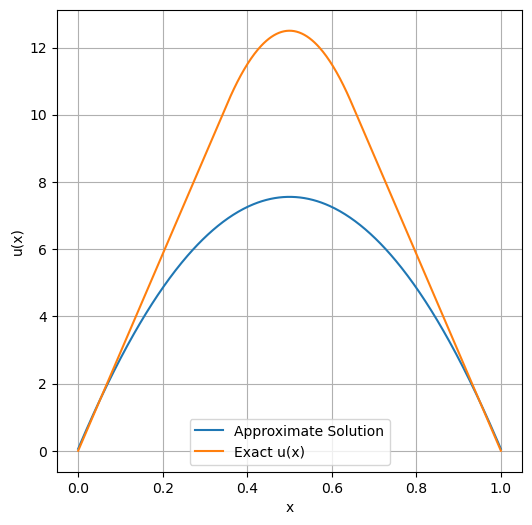

Epoch 3800/6000, Loss: 60.279327392578125


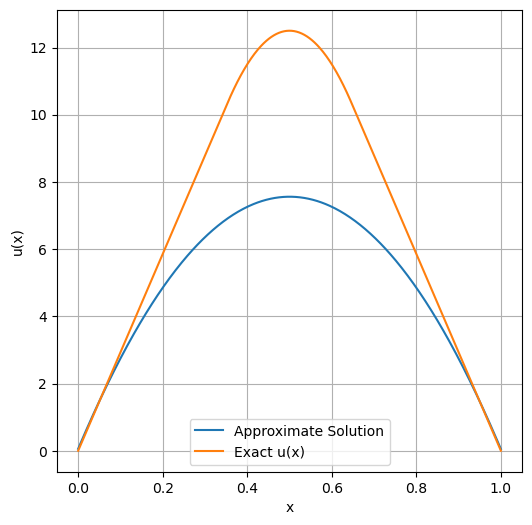

Epoch 3900/6000, Loss: 46.28072738647461


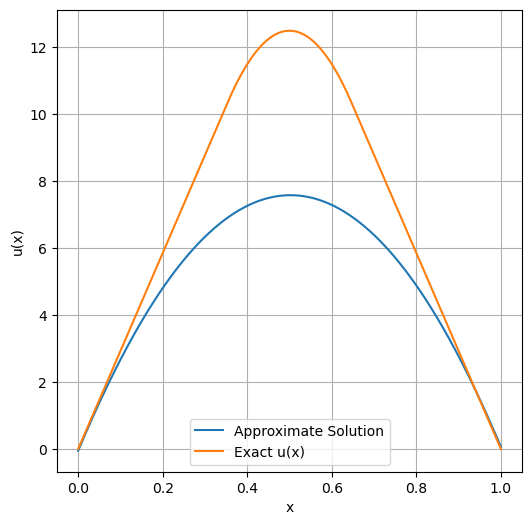

Epoch 4000/6000, Loss: 48.331722259521484


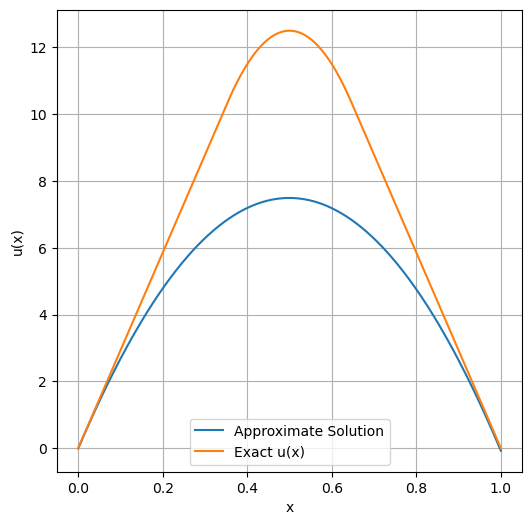

Epoch 4100/6000, Loss: 63.52835464477539


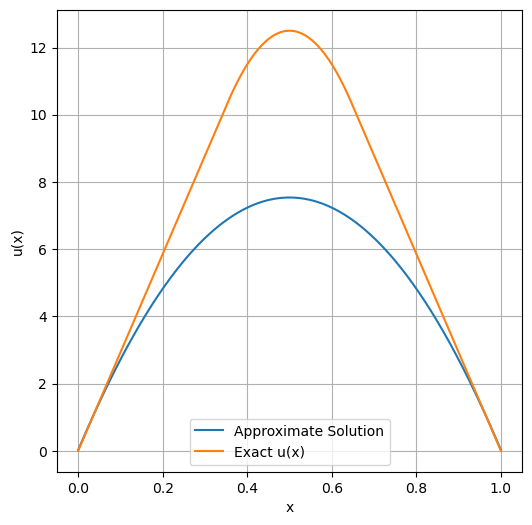

Epoch 4200/6000, Loss: 57.67539596557617


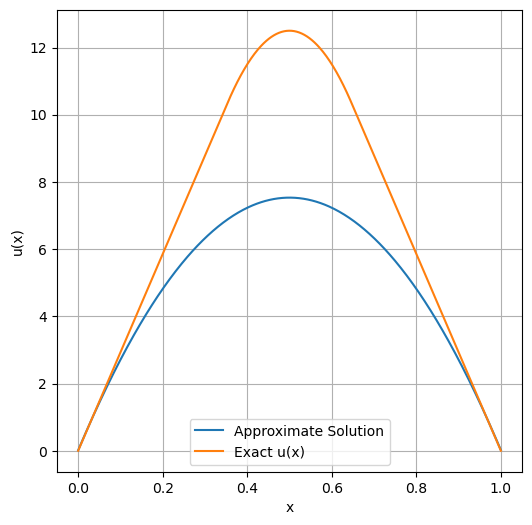

Epoch 4300/6000, Loss: 59.77390670776367


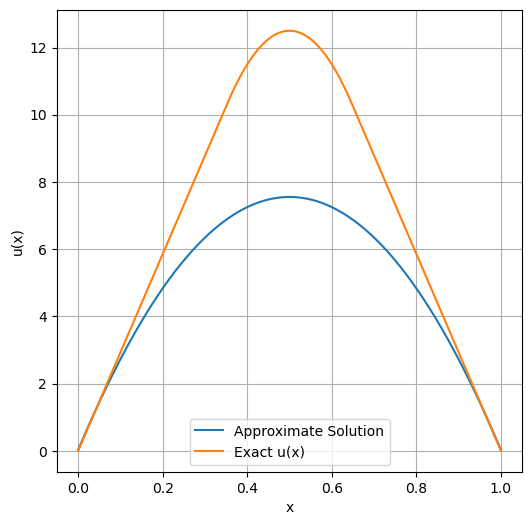

Epoch 4400/6000, Loss: 77.01002502441406


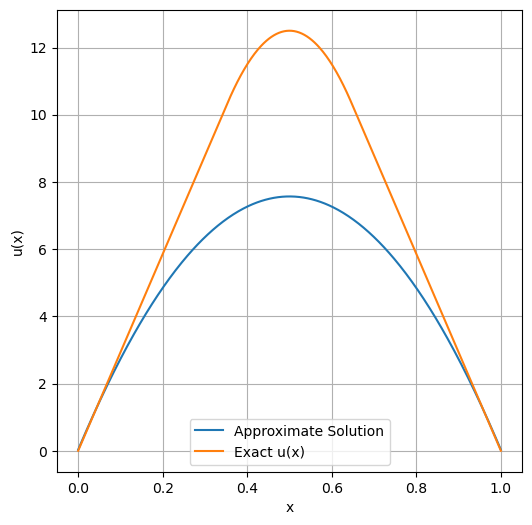

Epoch 4500/6000, Loss: 68.13239288330078


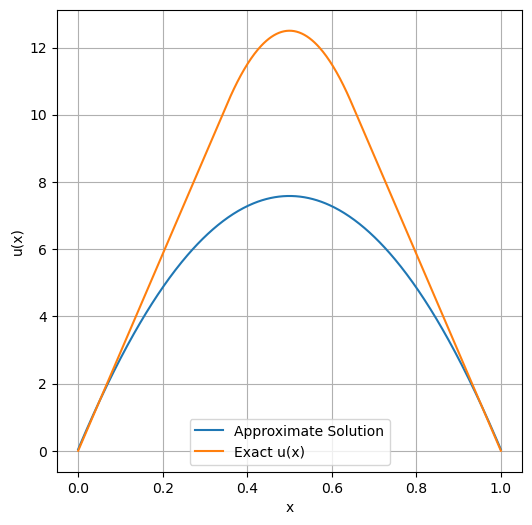

Epoch 4600/6000, Loss: 65.23550415039062


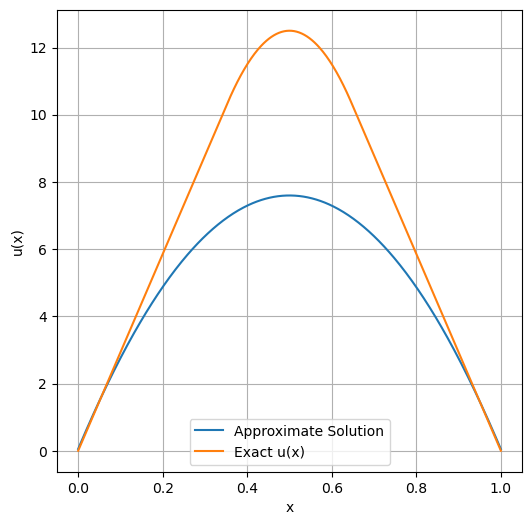

Epoch 4700/6000, Loss: 57.4168815612793


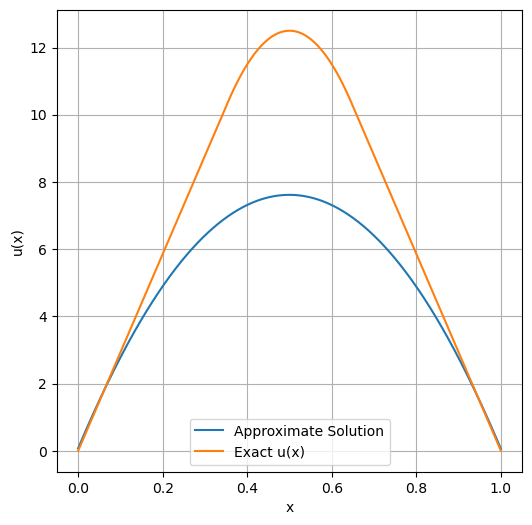

Epoch 4800/6000, Loss: 58.77730178833008


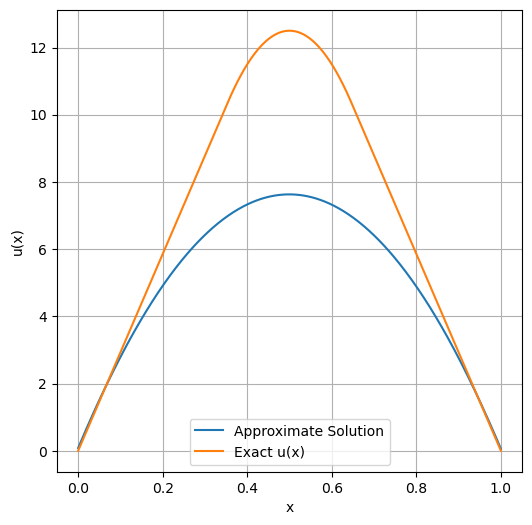

Epoch 4900/6000, Loss: 67.9019775390625


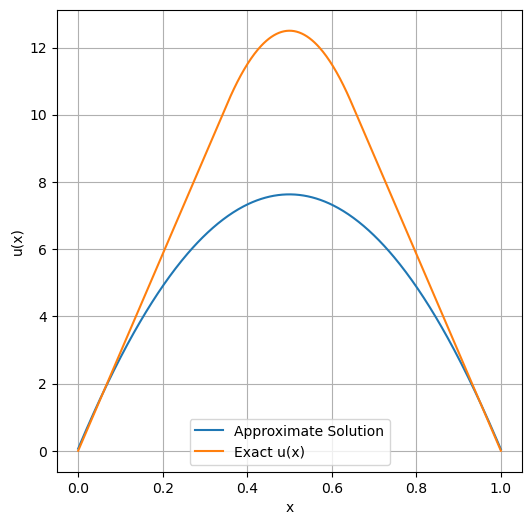

Epoch 5000/6000, Loss: 93.7321548461914


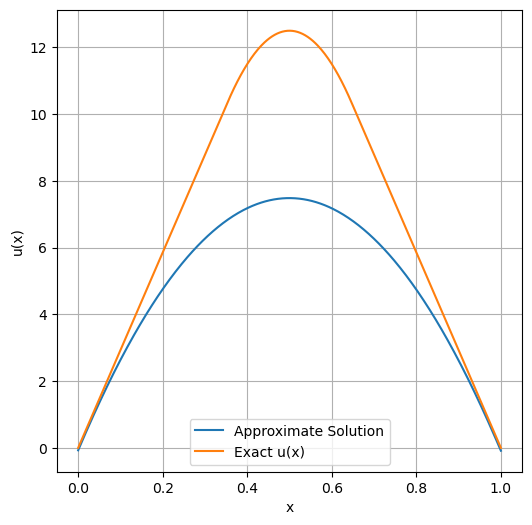

Epoch 5100/6000, Loss: 68.86156463623047


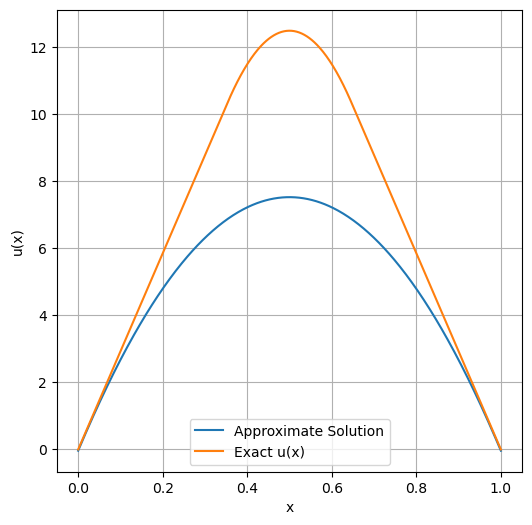

Epoch 5200/6000, Loss: 64.07919311523438


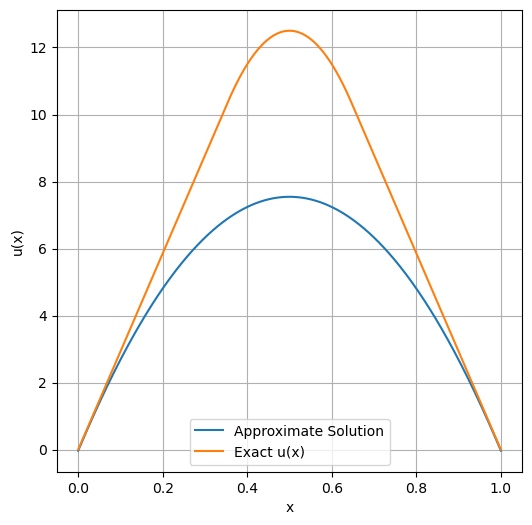

Epoch 5300/6000, Loss: 82.77104187011719


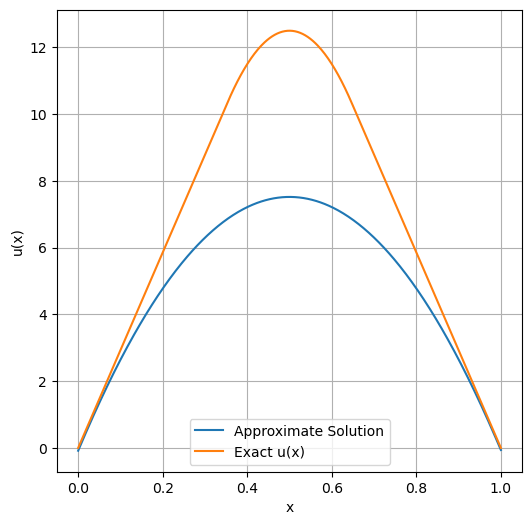

Epoch 5400/6000, Loss: 60.59217834472656


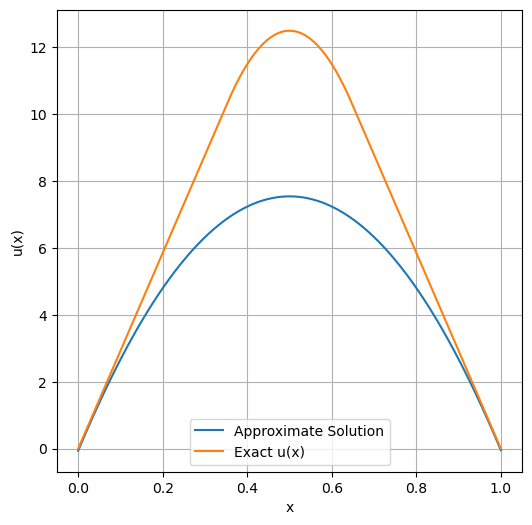

Epoch 5500/6000, Loss: 52.68034744262695


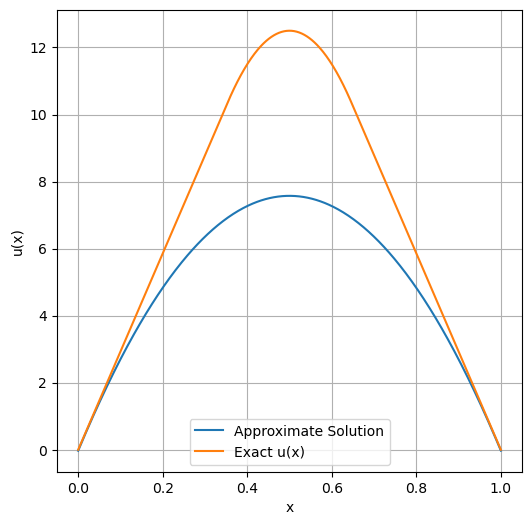

Epoch 5600/6000, Loss: 77.17379760742188


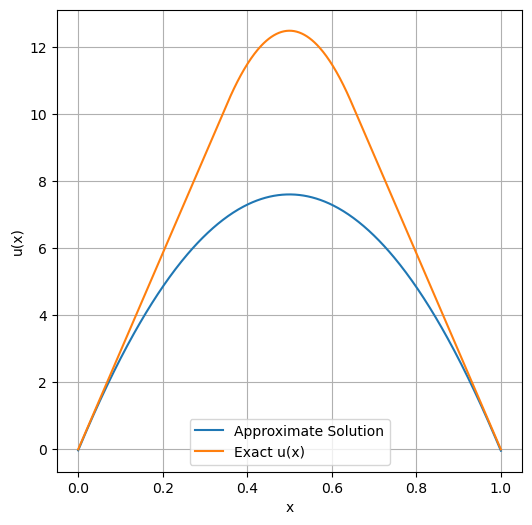

Epoch 5700/6000, Loss: 62.27706527709961


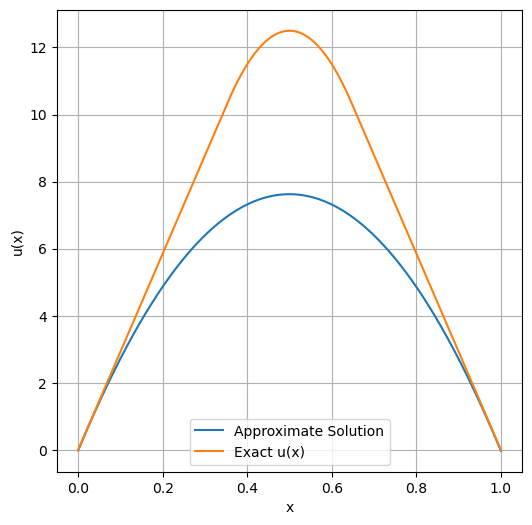

Epoch 5800/6000, Loss: 61.319820404052734


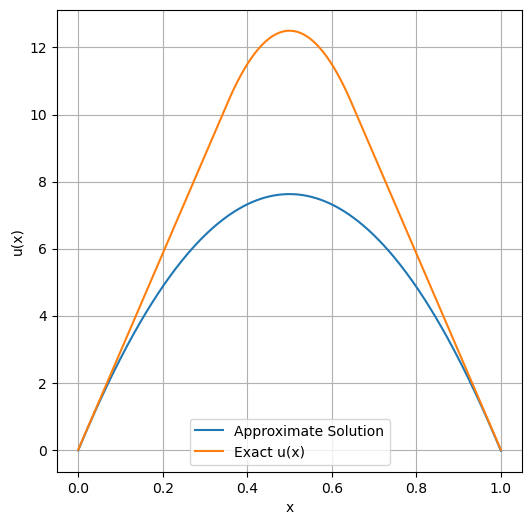

Epoch 5900/6000, Loss: 61.01410675048828


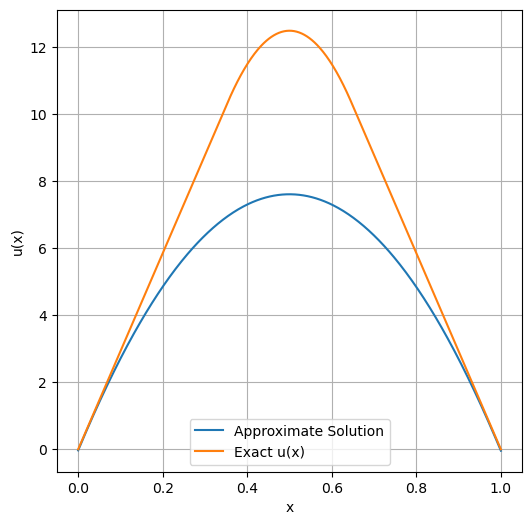

In [14]:
train(model, x, gx, gamma)

In [ ]:
u_approx = model.u_net(x)

x_np = x.detach().numpy()
u_approx_np = u_approx.detach().numpy()
lambda_np = model.lambda_net(x).detach().numpy()

u_exact_np = cal_u_exact(x).detach().numpy()
plt.plot(x_np, u_exact_np, label='Exact u(x)')
# plt.plot(x_np, gx.detach().numpy(), label='Obstacle g(x)')
plt.plot(x_np, u_approx_np, label='Approximate Solution')
plt.plot(x_np, lambda_np, label='Lambda Function')
plt.legend()
plt.grid(True)

plt.show()

In [3]:
l2_norm = np.linalg.norm(u_exact_np - u_approx_np)
l2_norm

NameError: name 'u_exact_np' is not defined

In [5]:
relative_error = np.linalg.norm(u_exact_np - u_approx_np) / np.linalg.norm(u_exact_np)

accurate_percentage = (1 - relative_error) * 100

print(f"The model accurately captures {accurate_percentage:.2f}% of u_exact_np.")

The model accurately captures 14.45% of u_exact_np.


In [4]:
torch.save(model.state_dict(), "model_parameters.pth")

In [14]:
def differentiable_heaviside(x, epsilon=1e-6):
    return (torch.tanh(x / epsilon) + 1) / 2

In [15]:
differentiable_heaviside(torch.tensor([1.0, 0.0, 2.0, -1.0, -2.0]))

tensor([1.0000, 0.5000, 1.0000, 0.0000, 0.0000])